In [586]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import glob
import numpy as np
import random
import math
from math import sqrt
import hashlib
import numpy as np
import matplotlib.animation as animation
import itertools
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches
import transformations as t
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.transform import Rotation
from IPython import display
import warnings
import scipy.stats
warnings.simplefilter(action='ignore', category=FutureWarning)

## Create DF for VICON data

In [602]:
# csv_files = Path("/home/nicola/gameapp/data/studyanalysis/").glob("study1H.csv")
# data_df = pd.concat([pd.read_csv(fp) for fp in csv_files])


csv_files = Path("/home/nicola/gameapp/data/studyanalysis/").glob("*H.csv")
data_df = pd.concat([pd.read_csv(fp).assign(GROUP=fp.name.split("H")[0]) for fp in csv_files])
data_df['GROUP']

0        study5
1        study5
2        study5
3        study5
4        study5
          ...  
76350    study2
76351    study2
76352    study2
76353    study2
76354    study2
Name: GROUP, Length: 384295, dtype: object

In [603]:
# data_df['1RZ'] = np.radians(data_df['1RZ'])-np.pi/2
# data_df['2RZ'] = np.radians(data_df['2RZ'])-np.pi/2
# data_df['3RZ'] = np.radians(data_df['3RZ'])-np.pi/2
# data_df['4RZ'] = np.radians(data_df['4RZ'])-np.pi/2
# data_df['5RZ'] = np.radians(data_df['5RZ'])-np.pi/2

data_df['1RZ'] = data_df['1RZ'] - 90
data_df['2RZ'] = data_df['2RZ'] - 90
data_df['3RZ'] = data_df['3RZ'] + 90
data_df['4RZ'] = data_df['4RZ'] - 90
data_df['5RZ'] = data_df['5RZ'] - 90

In [604]:
data_df

Frame  Sub Frame       1RX       1RY        1RZ          1TX  \
0          1          0 -0.115195  0.196168 -88.074492   631.253479   
1          2          0 -0.115261  0.196916 -88.074726   630.618652   
2          3          0 -0.115256  0.196015 -88.074986   629.957092   
3          4          0       NaN       NaN        NaN          NaN   
4          5          0       NaN       NaN        NaN          NaN   
...      ...        ...       ...       ...        ...          ...   
76350  76351          0  0.088994 -0.806801 -88.107589 -3132.166260   
76351  76352          0  0.089093 -0.806849 -88.107693 -3132.148682   
76352  76353          0  0.088678 -0.806874 -88.107451 -3132.178223   
76353  76354          0  0.089243 -0.807042 -88.107483 -3132.149658   
76354  76355          0  0.089199 -0.807100 -88.107611 -3132.206299   

               1TY          1TZ       2RX       2RY  ...          4TX  \
0      2317.773926  1683.526733  2.879745  0.420579  ...  -518.404053   
1      2315.973877  1683.219971  2.865308  0.407489  ...  -517.980103   
2      2314.270020  1682.867554  2.866667  0.406174  ...  -517.841187   
3              NaN          NaN  1.243309 -1.765108  ... -1777.828247   
4              NaN          NaN  1.244685 -1.769274  ... -1777.509277   
...            ...          ...       ...       ...  ...          ...   
76350  1553.572876   758.670349  0.122645  0.111159  ... -3269.663818   
76351  1553.546021   758.634644  0.083013  0.096077  ... -3269.582520   
76352  1553.566040   758.684753  0.082147  0.097031  ... -3269.576660   
76353  1553.575806   758.667725  0.084404  0.097384  ... -3269.669678   
76354  1553.568359   758.646667  0.087011  0.097487  ... -3269.591553   

               4TY          4TZ       5RX       5RY        5RZ          5TX  \
0      2798.893066  1858.355469  0.155586  1.001985 -89.638899 -1552.993774   
1      2799.645020  1858.416870  0.155870  1.001392 -89.638682 -1553.004639   
2      2800.129395  1858.440063  0.155981  1.001374 -89.638582 -1553.013794   
3      2679.449951  1699.191895  0.156464  1.000958 -89.638252 -1553.021362   
4      2680.676514  1699.133057  0.156652  1.000338 -89.638165 -1553.037720   
...            ...          ...       ...       ...        ...          ...   
76350  1826.473999   753.561951       NaN       NaN        NaN          NaN   
76351  1826.488403   753.573547       NaN       NaN        NaN          NaN   
76352  1826.459229   753.591125       NaN       NaN        NaN          NaN   
76353  1826.570068   753.547241       NaN       NaN        NaN          NaN   
76354  1826.472046   753.575317       NaN       NaN        NaN          NaN   

              5TY          5TZ   GROUP  
0      201.538330  1852.826050  study5  
1      201.206894  1852.814819  study5  
2      200.877823  1852.836914  study5  
3      200.498703  1852.835693  study5  
4      200.152481  1852.813477  study5  
...           ...          ...     ...  
76350         NaN          NaN  study2  
76351         NaN          NaN  study2  
76352         NaN          NaN  study2  
76353         NaN          NaN  study2  
76354         NaN          NaN  study2  

[384295 rows x 33 columns]

##### Distance - plot distance from person to person

In [605]:
df_dist= pd.DataFrame()  


OneTX, OneTY, OneTZ = data_df["1TX"], data_df["1TY"], data_df["1TZ"]
TwoTX, TwoTY, TwoTZ = data_df["2TX"], data_df["2TY"], data_df["2TZ"]
ThreeTX, ThreeTY, ThreeTZ = data_df["3TX"], data_df["3TY"], data_df["3TZ"]
FourTX, FourTY, FourTZ = data_df["4TX"], data_df["4TY"], data_df["4TZ"]
FiveTX, FiveTY, FiveTZ = data_df["5TX"], data_df["5TY"], data_df["5TZ"]

# df_dist["Frame"] = data_df['Frame']
df_dist["distance_1_2"] = np.power(np.power(OneTX-TwoTX,2) + np.power(OneTY-TwoTY,2), 0.5)
df_dist["distance_1_3"] = np.power(np.power(OneTX-ThreeTX,2) + np.power(OneTY-ThreeTY,2), 0.5)
df_dist["distance_1_4"] = np.power(np.power(OneTX-FourTX,2) + np.power(OneTY-FourTY,2), 0.5)
df_dist["distance_1_5"] = np.power(np.power(OneTX-FiveTX,2) + np.power(OneTY-FiveTY,2), 0.5)

df_dist["distance_2_1"] = np.power(np.power(TwoTX-OneTX,2) + np.power(TwoTY-OneTY,2), 0.5)
df_dist["distance_2_3"] = np.power(np.power(TwoTX-ThreeTX,2) + np.power(TwoTY-ThreeTY,2), 0.5)
df_dist["distance_2_4"] = np.power(np.power(TwoTX-FourTX,2) + np.power(TwoTY-FourTY,2), 0.5)
df_dist["distance_2_5"] = np.power(np.power(TwoTX-FiveTX,2) + np.power(TwoTY-FiveTY,2), 0.5)

df_dist["distance_3_1"] = np.power(np.power(ThreeTX-OneTX,2) + np.power(ThreeTY-OneTY,2), 0.5)
df_dist["distance_3_2"] = np.power(np.power(ThreeTX-TwoTX,2) + np.power(ThreeTY-TwoTY,2), 0.5)
df_dist["distance_3_4"] = np.power(np.power(ThreeTX-FourTX,2) + np.power(ThreeTY-FourTY,2), 0.5)
df_dist["distance_3_5"] = np.power(np.power(ThreeTX-FiveTX,2) + np.power(ThreeTY-FiveTY,2), 0.5)

df_dist["distance_4_1"] = np.power(np.power(FourTX-OneTX,2) + np.power(FourTY-OneTY,2), 0.5)
df_dist["distance_4_2"] = np.power(np.power(FourTX-TwoTX,2) + np.power(FourTY-TwoTY,2), 0.5)
df_dist["distance_4_3"] = np.power(np.power(FourTX-ThreeTX,2) + np.power(FourTY-ThreeTY,2), 0.5)
df_dist["distance_4_5"] = np.power(np.power(FourTX-FiveTX,2) + np.power(FourTY-FiveTY,2), 0.5)

df_dist["distance_5_1"] = np.power(np.power(FiveTX-OneTX,2) + np.power(FiveTY-OneTY,2), 0.5)
df_dist["distance_5_2"] = np.power(np.power(FiveTX-TwoTX,2) + np.power(FiveTY-TwoTY,2), 0.5)
df_dist["distance_5_3"] = np.power(np.power(FiveTX-ThreeTX,2) + np.power(FiveTY-ThreeTY,2), 0.5)
df_dist["distance_5_4"] = np.power(np.power(FiveTX-FourTX,2) + np.power(FiveTY-FourTY,2), 0.5)

# df_dist=(df_dist-df_dist.mean())/df_dist.std()
df_dist=(df_dist-df_dist.min())/(df_dist.max()-df_dist.min())
df_dist['Frame'] = df_dist.index
df_dist

distance_1_2  distance_1_3  distance_1_4  distance_1_5  distance_2_1  \
0          0.250649      0.005819      0.184591      0.820806      0.250649   
1          0.250579      0.005796      0.184593      0.820408      0.250579   
2          0.250418      0.005875      0.184610      0.820023      0.250418   
3               NaN           NaN           NaN           NaN           NaN   
4               NaN           NaN           NaN           NaN           NaN   
...             ...           ...           ...           ...           ...   
76350      0.207699      0.297929      0.045235           NaN      0.207699   
76351      0.207779      0.298133      0.045236           NaN      0.207779   
76352      0.207748      0.298311      0.045228           NaN      0.207748   
76353      0.207801      0.298106      0.045249           NaN      0.207801   
76354      0.207803      0.298186      0.045228           NaN      0.207803   

       distance_2_3  distance_2_4  distance_2_5  distance_3_1  distance_3_2  \
0          0.270643      0.243207      0.192227      0.005819      0.270643   
1          0.270549      0.243413      0.192100      0.005796      0.270549   
2          0.270284      0.243548      0.192062      0.005875      0.270284   
3          0.006182      0.371635      0.441409           NaN      0.006182   
4          0.006197      0.371595      0.441190           NaN      0.006197   
...             ...           ...           ...           ...           ...   
76350      0.023655      0.168347           NaN      0.297929      0.023655   
76351      0.023765      0.168428           NaN      0.298133      0.023765   
76352      0.023991      0.168405           NaN      0.298311      0.023991   
76353      0.023721      0.168438           NaN      0.298106      0.023721   
76354      0.023801      0.168461           NaN      0.298186      0.023801   

       ...  distance_3_5  distance_4_1  distance_4_2  distance_4_3  \
0      ...      0.546142      0.184591      0.243207      0.203913   
1      ...      0.545860      0.184593      0.243413      0.203836   
2      ...      0.545504      0.184610      0.243548      0.203793   
3      ...      0.545289           NaN      0.371635      0.397459   
4      ...      0.545064           NaN      0.371595      0.397394   
...    ...           ...           ...           ...           ...   
76350  ...           NaN      0.045235      0.168347      0.208324   
76351  ...           NaN      0.045236      0.168428      0.208501   
76352  ...           NaN      0.045228      0.168405      0.208666   
76353  ...           NaN      0.045249      0.168438      0.208463   
76354  ...           NaN      0.045228      0.168461      0.208557   

       distance_4_5  distance_5_1  distance_5_2  distance_5_3  distance_5_4  \
0          0.423265      0.820806      0.192227      0.546142      0.423265   
1          0.423442      0.820408      0.192100      0.545860      0.423442   
2          0.423565      0.820023      0.192062      0.545504      0.423565   
3          0.376796           NaN      0.441409      0.545289      0.376796   
4          0.377029           NaN      0.441190      0.545064      0.377029   
...             ...           ...           ...           ...           ...   
76350           NaN           NaN           NaN           NaN           NaN   
76351           NaN           NaN           NaN           NaN           NaN   
76352           NaN           NaN           NaN           NaN           NaN   
76353           NaN           NaN           NaN           NaN           NaN   
76354           NaN           NaN           NaN           NaN           NaN   

       Frame  
0          0  
1          1  
2          2  
3          3  
4          4  
...      ...  
76350  76350  
76351  76351  
76352  76352  
76353  76353  
76354  76354  

[384295 rows x 21 columns]

### Plot location

10000   -1442.157959
10001   -1442.608643
10002   -1443.224365
10003   -1443.643066
10004   -1443.928589
            ...     
59309    1019.692566
59310    1528.373535
59311    1527.615112
59312    1527.082031
59313    1526.210327
Name: 5TX, Length: 49314, dtype: float64


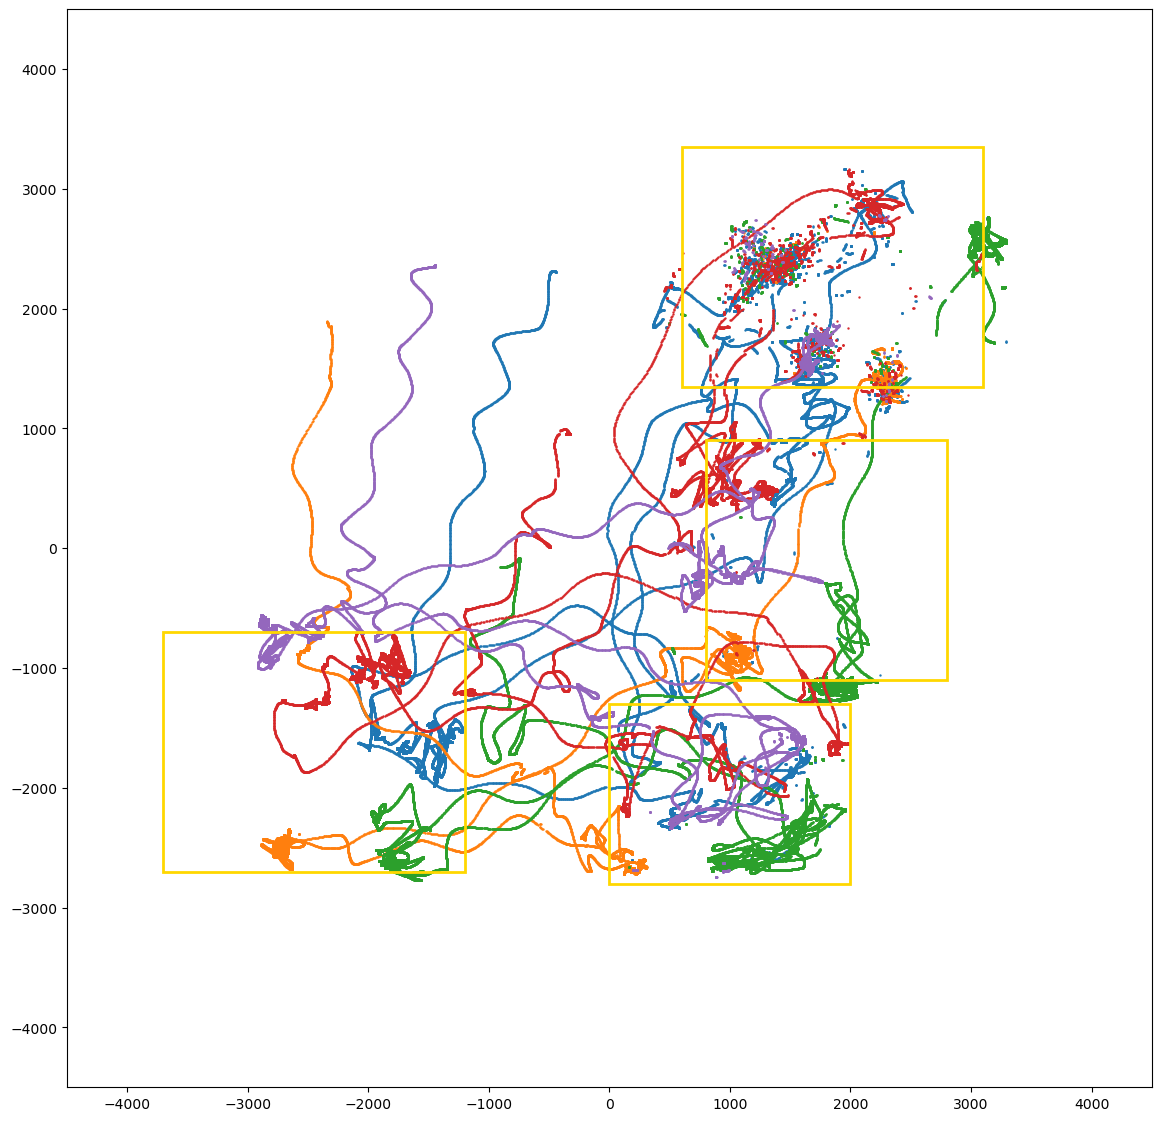

10000   -1320.150757
10001   -1319.952881
10002   -1319.769165
10003   -1319.582275
10004   -1319.413452
            ...     
76350            NaN
76351            NaN
76352            NaN
76353            NaN
76354            NaN
Name: 5TX, Length: 66355, dtype: float64


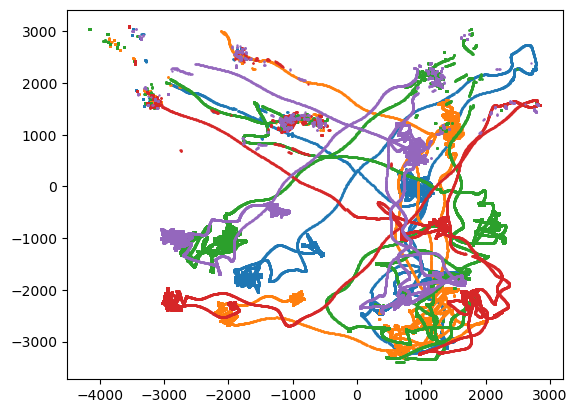

10000   -1445.514648
10001   -1445.390259
10002   -1445.977295
10003   -1446.026123
10004   -1445.925415
            ...     
48970    1282.454346
48971    1278.942993
48972    1275.679932
48973    1272.850464
48974    1269.163818
Name: 5TX, Length: 38975, dtype: float64


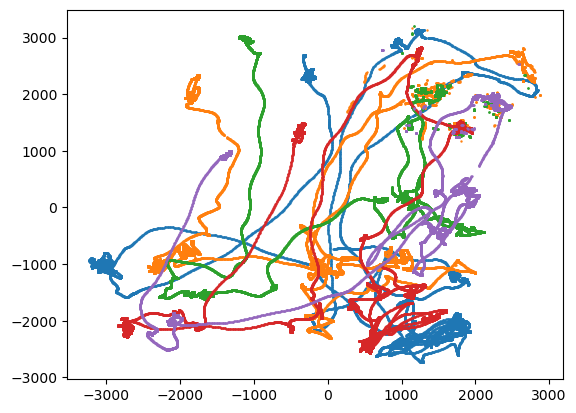

10000     410.397247
10001     411.878571
10002     413.324554
10003     414.709473
10004     416.060822
            ...     
73044    2604.039062
73045    2604.049805
73046    2604.036621
73047    2604.043701
73048    2604.054199
Name: 5TX, Length: 63049, dtype: float64


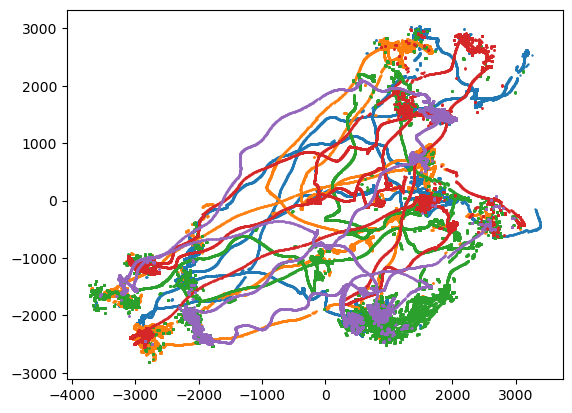

10000   -2343.827148
10001   -2343.745850
10002   -2343.613037
10003   -2343.480469
10004   -2343.310791
            ...     
46479     700.212280
46480     698.153992
46481     694.938049
46482    2513.056885
46483    2513.210693
Name: 5TX, Length: 36484, dtype: float64


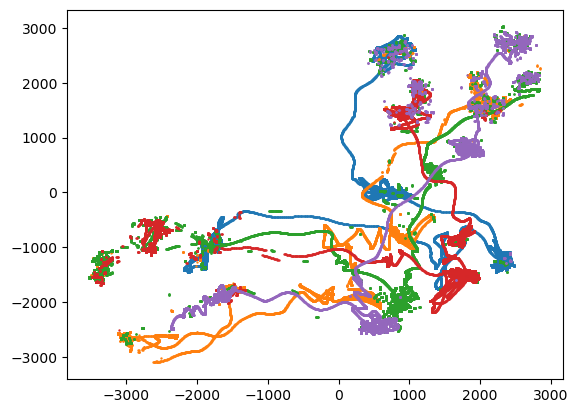

10000   -285.237427
10001   -285.258026
10002   -285.380920
10003   -285.289642
10004   -285.168915
            ...    
80113    663.993103
80114    663.992859
80115    663.987854
80116    663.994568
80117    663.986206
Name: 5TX, Length: 70118, dtype: float64


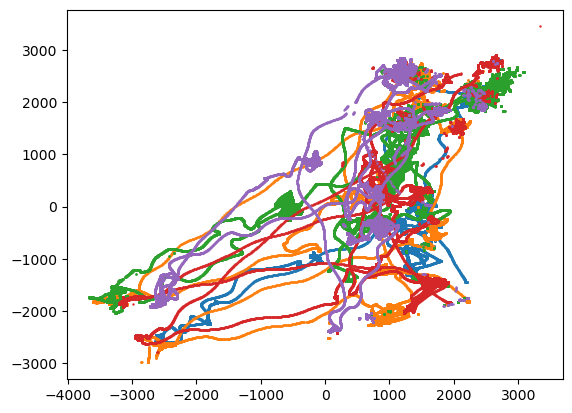

In [611]:
fig, ax = plt.subplots()

grouped = data_df.groupby('GROUP')

plt.xlim(-4500, 4500)
plt.ylim(-4500, 4500)

start = 10000
end = 100000

for name, group in grouped:
    x = group.iloc[start:end]['1TX']
    y = group.iloc[start:end]['1TY']
    plt.scatter(x, y, s=0.5)
    
    x = group.iloc[start:end]['2TX']
    y = group.iloc[start:end]['2TY']
    plt.scatter(x, y, s=0.5)
    
    
    x = group.iloc[start:end]['3TX']
    y = group.iloc[start:end]['3TY']
    plt.scatter(x, y, s=1)
    
    
    x = group.iloc[start:end]['4TX']
    y = group.iloc[start:end]['4TY']
    plt.scatter(x, y, s=0.5)
    
    
    x = group.iloc[start:end]['5TX']
    y = group.iloc[start:end]['5TY']
    plt.scatter(x, y, s=0.5)
    print(x)
    
    
    # Display the image
    # Create a Rectangle patch
    rect1 = patches.Rectangle((-3700, -2700), 2500, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect2 = patches.Rectangle((600, 1350), 2500, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect3 = patches.Rectangle((800, -1100), 2000, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect4 = patches.Rectangle((0, -2800), 2000, 1500, linewidth=2, edgecolor='gold', facecolor='none')
    
    
    # Add the patch to the
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
    ax.add_patch(rect4)
    
    width = 14
    height = 14
    fig.set_size_inches(width, height)
    
    plt.show()


### Plot with gaze direction

10600


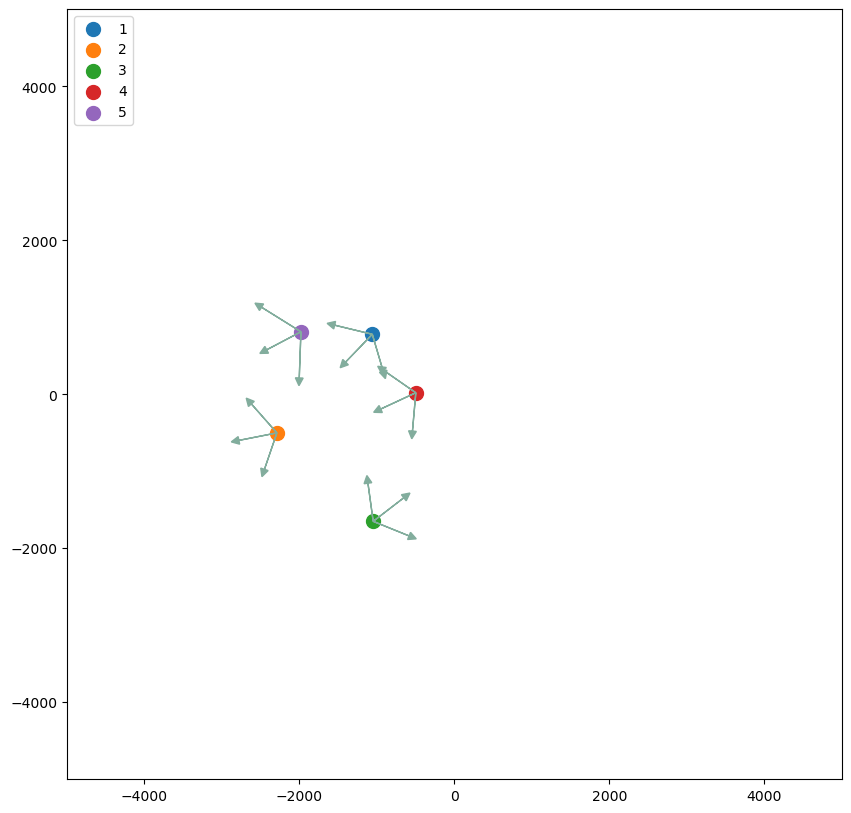

In [221]:
# fov_angle = math.radians(60)

start =10600
end = 10601

length = 500

for index, row in  data_df.iloc[start:end:1].iterrows():
    fig, ax = plt.subplots(figsize=(10, 10))
     
    plt.xlim(-5000, 5000)
    plt.ylim(-5000, 5000)

    x = row["1TX"]
    y = row["1TY"]
    yaw = row["1RZ"]

    fig.clear()

    plt.xlim(-5000, 5000)
    plt.ylim(-5000, 5000)

    plt.scatter(x, y, s=100, label="1")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["2TX"]
    y = row["2TY"]
    yaw = row["2RZ"]
    plt.scatter(x, y, s=100, label="2")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["3TX"]
    y = row["3TY"]
    yaw = row["3RZ"]
    plt.scatter(x, y, s=100, label="3")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["4TX"]
    y = row["4TY"]
    yaw = row["4RZ"]
    plt.scatter(x, y, s=100, label="4")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["5TX"]
    y = row["5TY"]
    yaw = row["5RZ"]
    plt.scatter(x, y, s=100, label="5")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        600 * np.cos(yaw - fov_angle),
        600 * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        600 * np.cos(yaw + fov_angle),
        600 * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )


    plt.legend(loc="upper left")
    print(index)
    plt.show()
    

### Transformations

In [612]:
def get_transform_world_2_player(array, agls):
    Tpw = t.compose_matrix(translate=[array[0], array[1], array[2]], angles=agls) #returns 4x4
    Twp = np.linalg.inv(Tpw)
    return(Twp)

def transform_participants(px, py, pz, p_rx, p_ry, p_rz, nx, ny, nz):
    Twp = get_transform_world_2_player([px, py, pz], [p_rx, p_ry, p_rz])
    return Twp.dot(np.array([float(nx),float(ny),float(nz),1.0]))


count = 1

for i in range(1,6):
    print(i)
    x = '%sTX'%i
    y = '%sTY'%i
    z = '%sTZ'%i
    p = '%sRX'%i
    r = '%sRY'%i
    yaw = '%sRZ'%i
    
    for j in range(1,6):
        x1 = '%sTX'%j
        y1 = '%sTY'%j
        z1 = '%sTZ'%j
        p1 = '%sRX'%j
        r1 = '%sRY'%j
        yaw1 = '%sRZ'%j
        if i == j:
            continue
        print(x, x1)
        data_df["%s%sx"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[0], axis=1)
        data_df["%s%sy"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[1], axis=1)
        data_df["%s%sz"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[2], axis=1)
        print("%s%sz"%(i,j))



1
1TX 2TX
12z
1TX 3TX
13z
1TX 4TX
14z
1TX 5TX
15z
2
2TX 1TX
21z
2TX 3TX
23z
2TX 4TX
24z
2TX 5TX
25z
3
3TX 1TX
31z
3TX 2TX
32z
3TX 4TX
34z
3TX 5TX
35z
4
4TX 1TX
41z
4TX 2TX
42z
4TX 3TX
43z
4TX 5TX
45z
5
5TX 1TX
51z
5TX 2TX
52z
5TX 3TX
53z
5TX 4TX
54z


### Angle/FOV

In [616]:
#fov
fov_angle = math.radians(60)
tan = math.tan(fov_angle)

fov_df = pd.DataFrame()  
soc_eng = pd.DataFrame() 

soc_eng["Frame"] = data_df['Frame']

#in FOV or not?
def fov_dist(df, id):
    series = (1-abs(df['%sy'%id]/(tan*df['%sx'%id]))).clip(0)
    
    # if the other person is *behind*, set the 'fov_dist' to zero (not visible)
    series[data_df['%sx'%id] < 0] = 0
    return series

fov_df["Frame"] = data_df['Frame']

for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        fov_df["fov_p_%s_%s"% (i,j)] = fov_dist(data_df, "%s%s" %(i,j))

for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        fov_df["fov_%s_%s"% (i,j)] = (fov_df["fov_p_%s_%s"% (i,j)] * fov_df["fov_p_%s_%s"% (i,j)])
        soc_eng["social_engagement_%s_%s"% (i,j)] = (fov_df["fov_%s_%s"% (i,j)] / df_dist["distance_%s_%s" %(i, j)]).clip(0,1)
        soc_eng['GROUP'] = data_df['GROUP']


### Social Engagement Metric 

In [617]:
soc_eng

Frame  social_engagement_1_2   GROUP  social_engagement_1_3  \
0          1                    0.0  study5                    0.0   
1          2                    0.0  study5                    0.0   
2          3                    0.0  study5                    0.0   
3          4                    NaN  study5                    NaN   
4          5                    NaN  study5                    NaN   
...      ...                    ...     ...                    ...   
76350  76351                    0.0  study2                    0.0   
76351  76352                    0.0  study2                    0.0   
76352  76353                    0.0  study2                    0.0   
76353  76354                    0.0  study2                    0.0   
76354  76355                    0.0  study2                    0.0   

       social_engagement_1_4  social_engagement_1_5  social_engagement_2_1  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        NaN                    NaN                    NaN   
4                        NaN                    NaN                    NaN   
...                      ...                    ...                    ...   
76350                    0.0                    NaN                    0.0   
76351                    0.0                    NaN                    0.0   
76352                    0.0                    NaN                    0.0   
76353                    0.0                    NaN                    0.0   
76354                    0.0                    NaN                    0.0   

       social_engagement_2_3  social_engagement_2_4  social_engagement_2_5  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
76350                    0.0                    0.0                    NaN   
76351                    0.0                    0.0                    NaN   
76352                    0.0                    0.0                    NaN   
76353                    0.0                    0.0                    NaN   
76354                    0.0                    0.0                    NaN   

       ...  social_engagement_3_4  social_engagement_3_5  \
0      ...                    0.0                    1.0   
1      ...                    0.0                    1.0   
2      ...                    0.0                    1.0   
3      ...                    0.0                    1.0   
4      ...                    0.0                    1.0   
...    ...                    ...                    ...   
76350  ...                    0.0                    NaN   
76351  ...                    0.0                    NaN   
76352  ...                    0.0                    NaN   
76353  ...                    0.0                    NaN   
76354  ...                    0.0                    NaN   

       social_engagement_4_1  social_engagement_4_2  social_engagement_4_3  \
0                   0.000000                    0.0                    0.0   
1                   0.000000                    0.0                    0.0   
2                   0.000000                    0.0                    0.0   
3                        NaN                    0.0                    0.0   
4                        NaN                    0.0                    0.0   
...                      ...                    ...                    ...   
76350               0.375

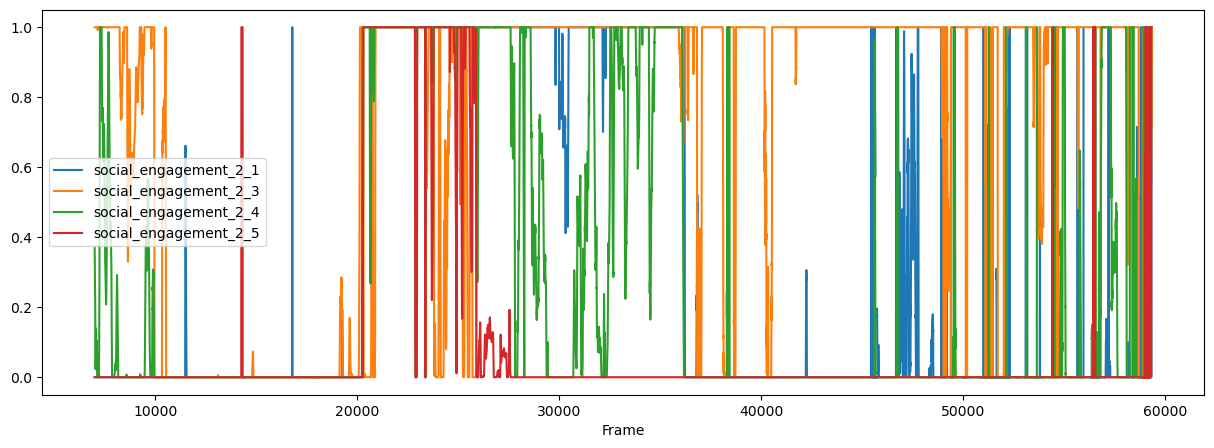

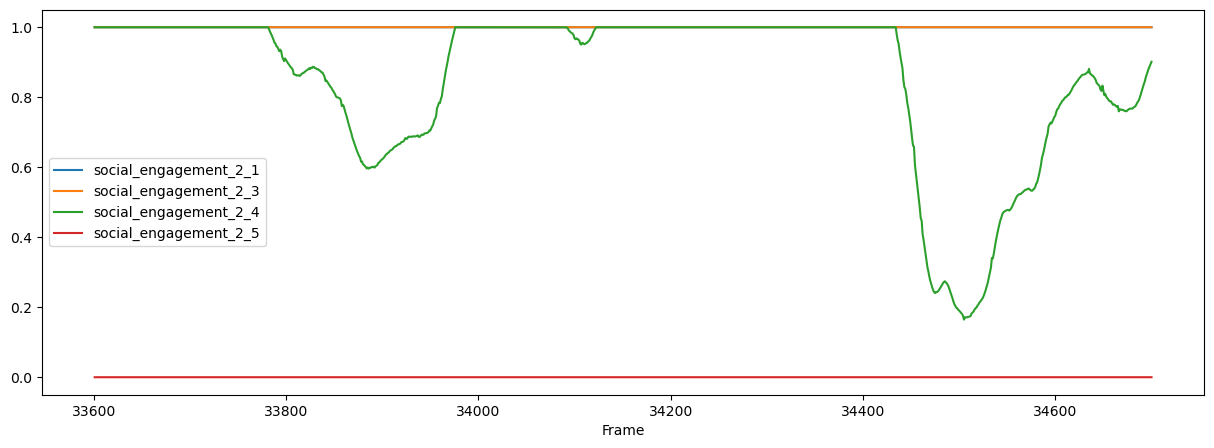

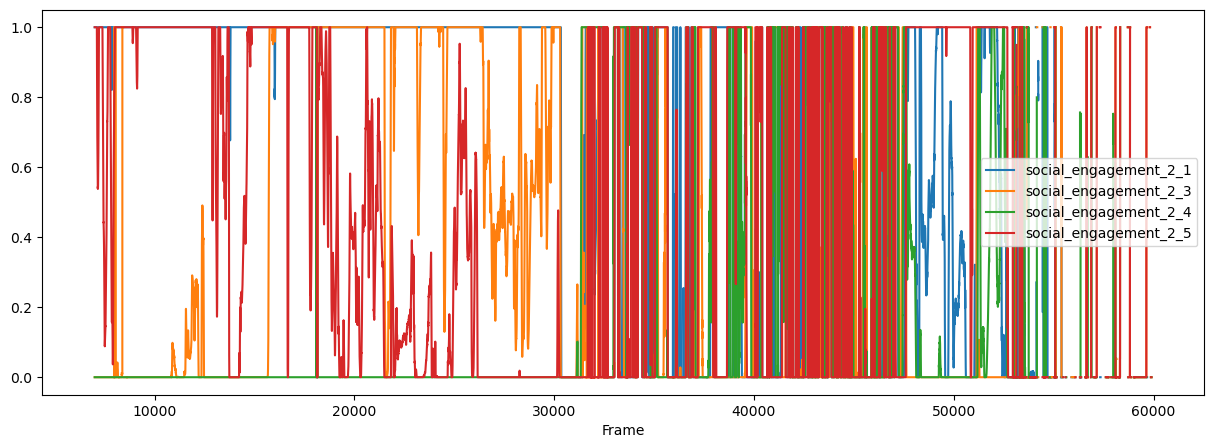

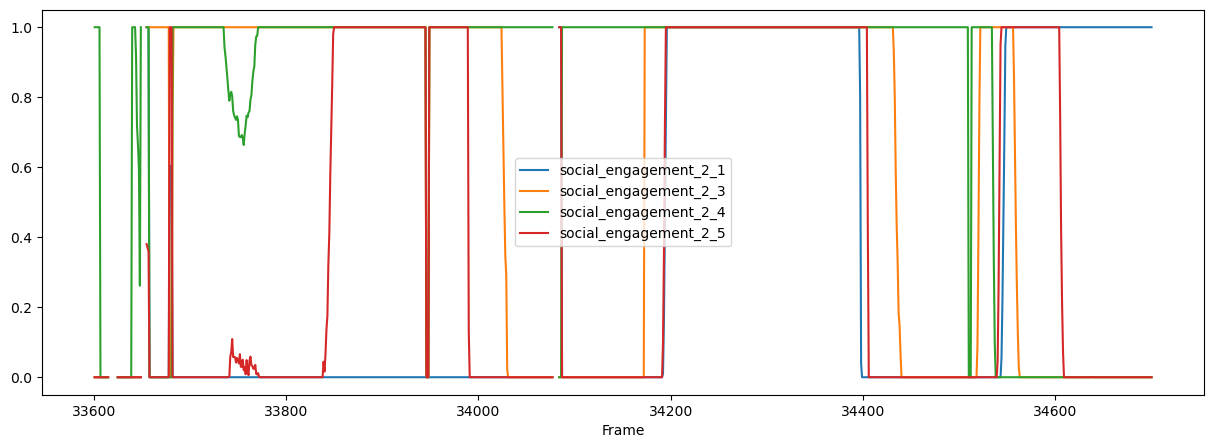

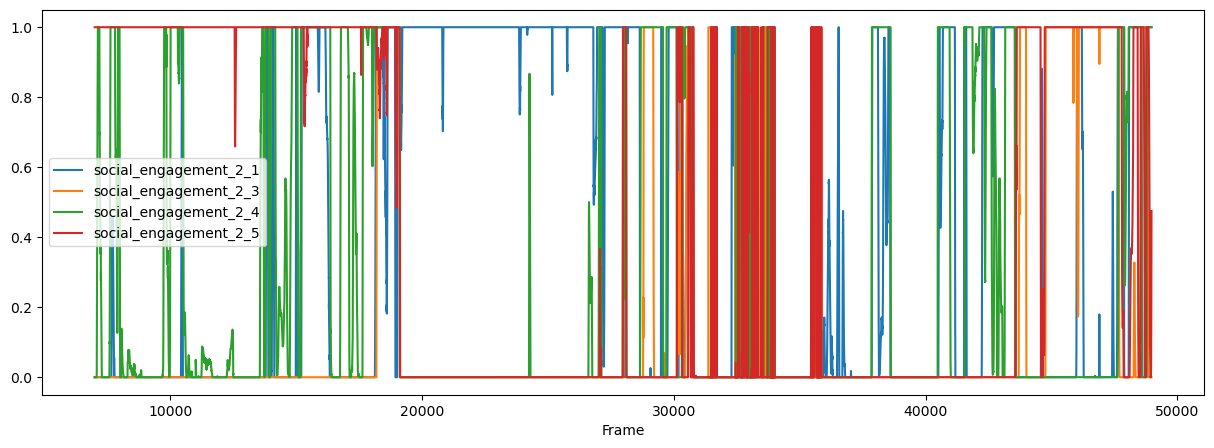

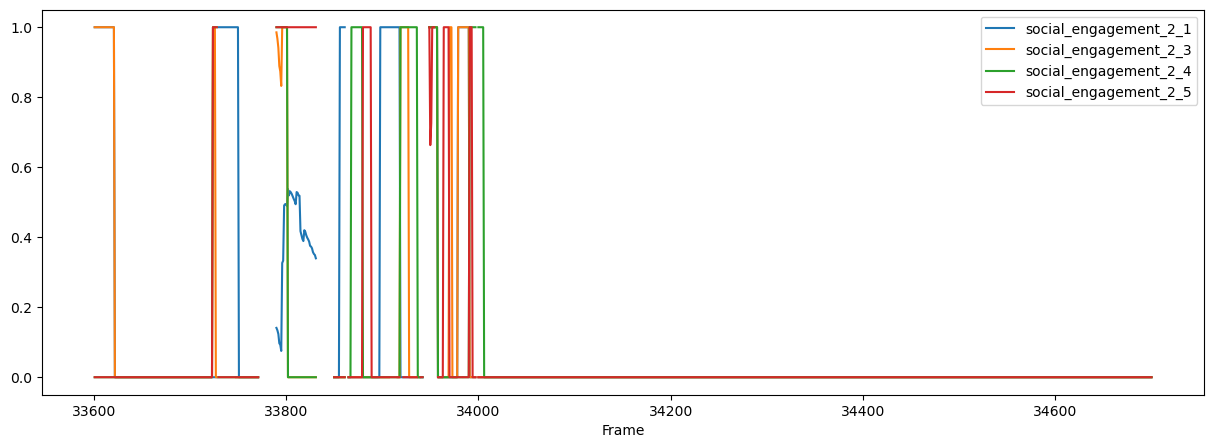

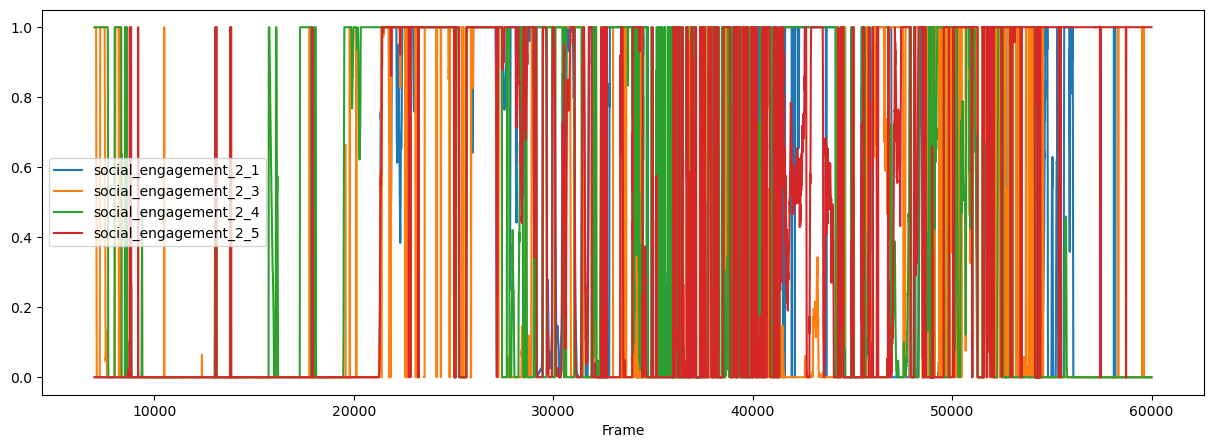

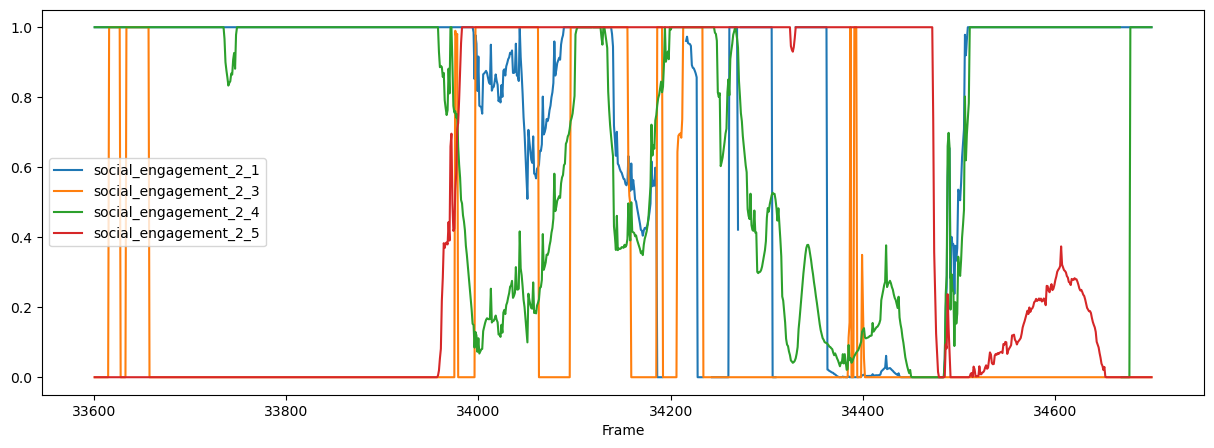

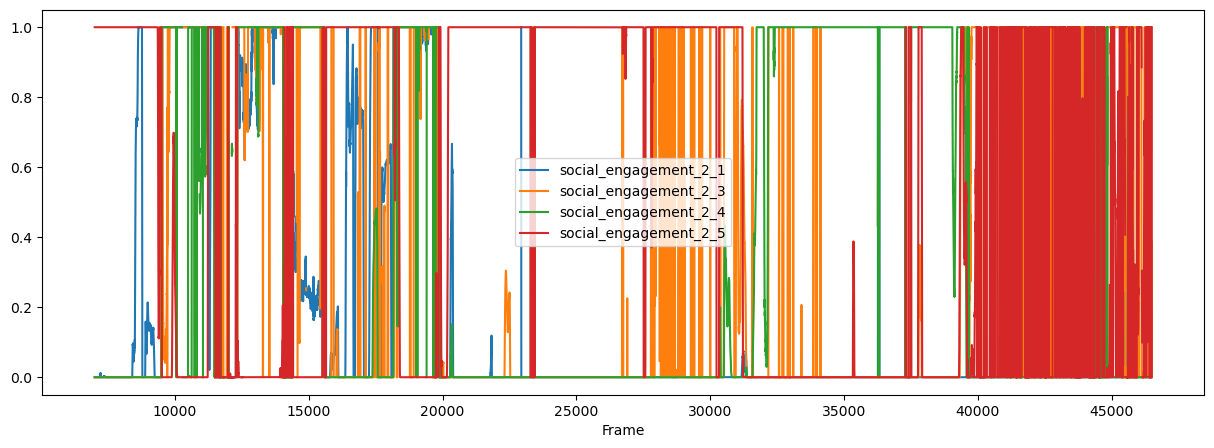

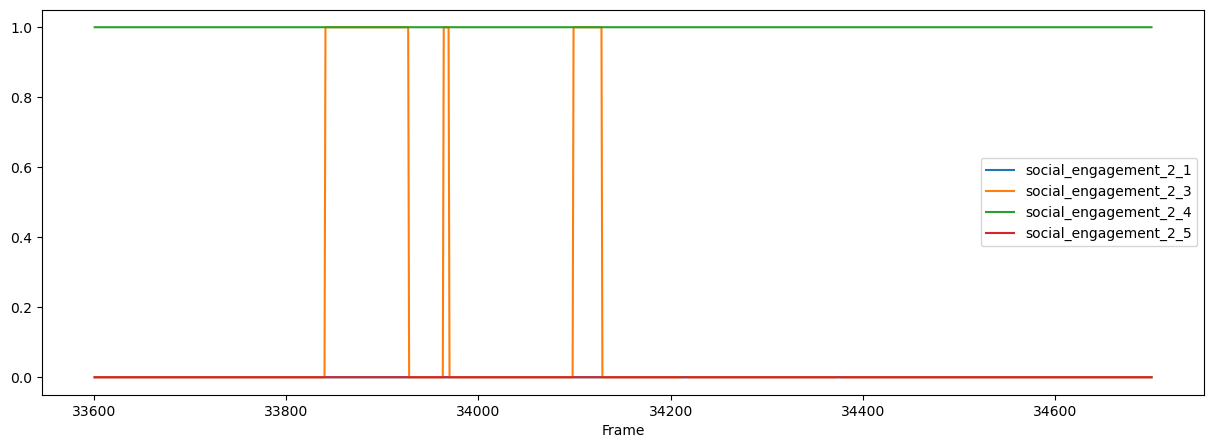

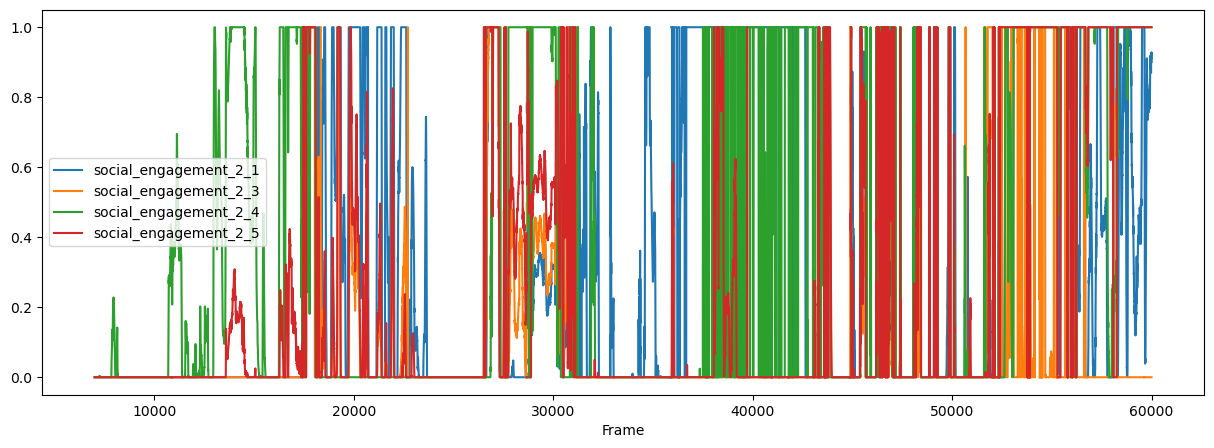

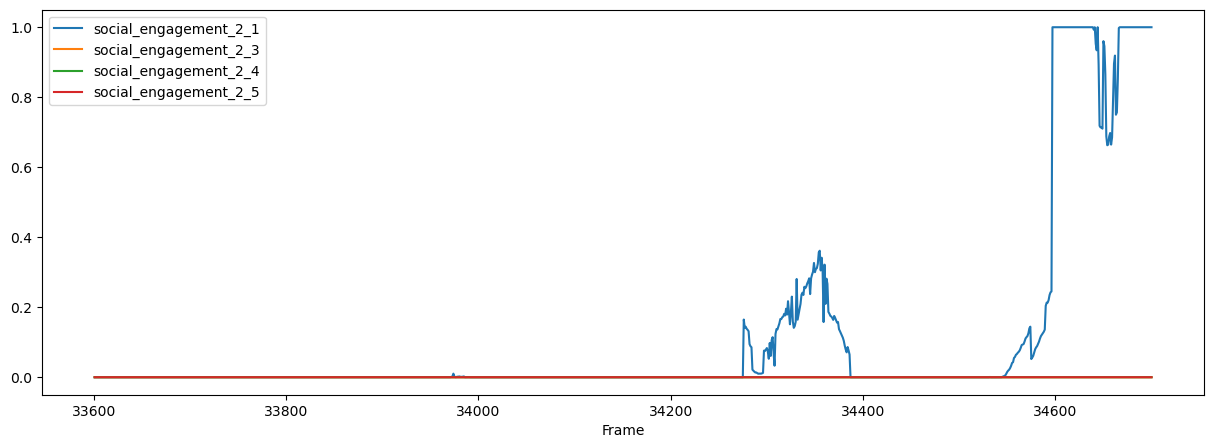

In [628]:
grouped = soc_eng.groupby('GROUP')

for name, group in grouped:
    group.iloc[7000:60000][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))
    group.iloc[33600:34700][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))

In [634]:
avg_eng = pd.DataFrame()  

avg_eng['soc_average_1'] = soc_eng[["social_engagement_1_2", "social_engagement_1_3", "social_engagement_1_4", "social_engagement_1_5"]].mean(axis=1)
avg_eng['soc_average_2'] = soc_eng[["social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].mean(axis=1, numeric_only=True)
avg_eng['soc_average_3'] = soc_eng[["social_engagement_3_1", "social_engagement_3_2", "social_engagement_3_4", "social_engagement_3_5"]].mean(axis=1)
avg_eng['soc_average_4'] = soc_eng[["social_engagement_4_1", "social_engagement_4_2", "social_engagement_4_3", "social_engagement_4_5"]].mean(axis=1)
avg_eng['soc_average_5'] = soc_eng[["social_engagement_5_1", "social_engagement_5_2", "social_engagement_5_3", "social_engagement_5_4"]].mean(axis=1)
avg_eng['GROUP'] = soc_eng["GROUP"]
avg_eng = avg_eng.reset_index()
# avg_eng = avg_eng.drop('index', axis=1)

avg_eng = avg_eng.fillna(0)
avg_eng
# print(soc_eng.describe())
# print(avg_eng.describe())

index  soc_average_1  soc_average_2  soc_average_3  soc_average_4  \
0           0            0.0            0.0       0.500000       0.000000   
1           1            0.0            0.0       0.500000       0.000000   
2           2            0.0            0.0       0.500000       0.000000   
3           3            0.0            0.0       0.333333       0.000000   
4           4            0.0            0.0       0.333333       0.000000   
...       ...            ...            ...            ...            ...   
384290  76350            0.0            0.0       0.000000       0.125020   
384291  76351            0.0            0.0       0.000000       0.125602   
384292  76352            0.0            0.0       0.000000       0.121048   
384293  76353            0.0            0.0       0.000000       0.119605   
384294  76354            0.0            0.0       0.000000       0.118465   

        soc_average_5   GROUP  
0                 0.0  study5  
1                 0.0  study5  
2                 0.0  study5  
3                 0.0  study5  
4                 0.0  study5  
...               ...     ...  
384290            0.0  study2  
384291            0.0  study2  
384292            0.0  study2  
384293            0.0  study2  
384294            0.0  study2  

[384295 rows x 7 columns]

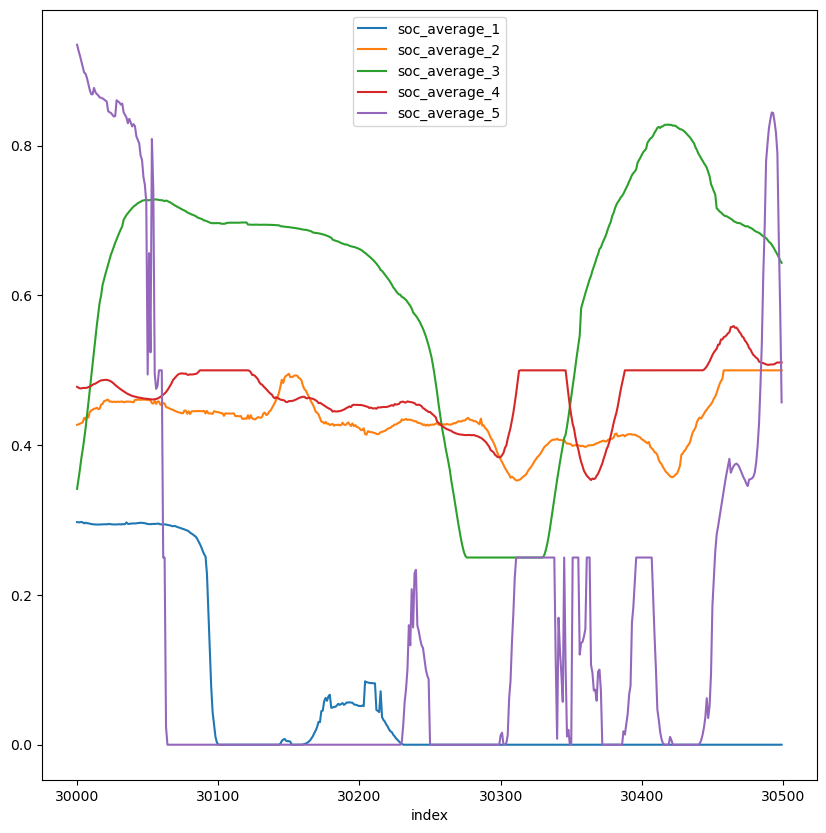

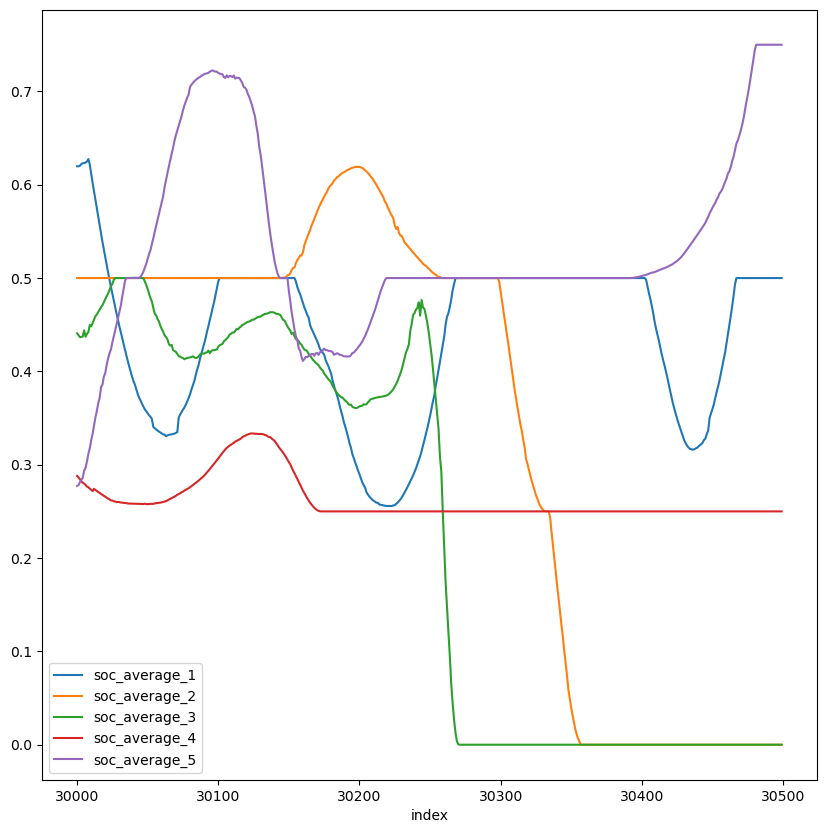

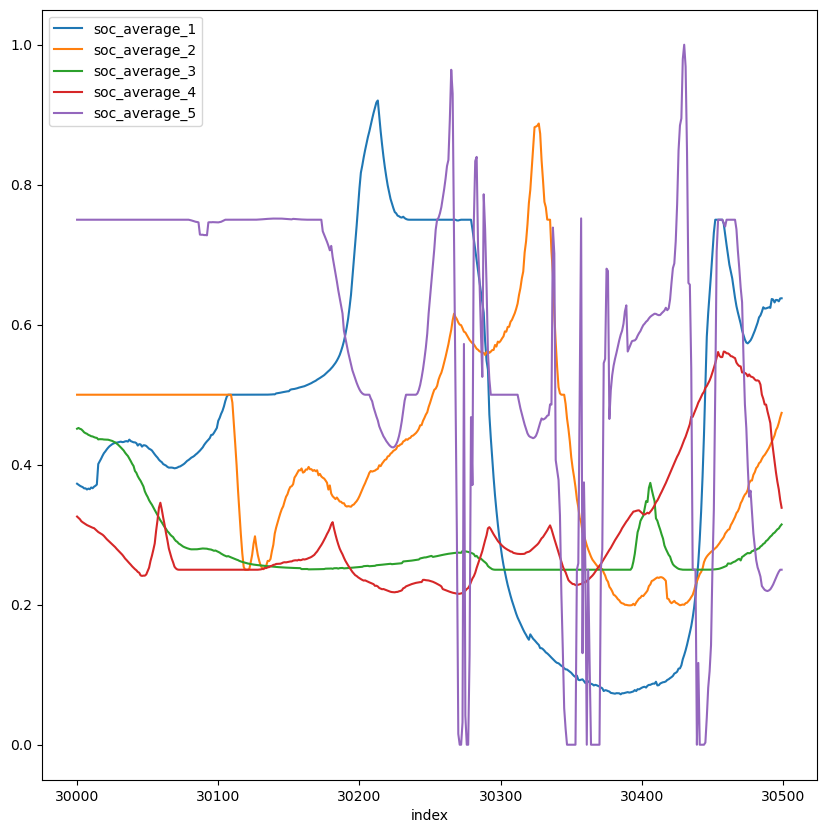

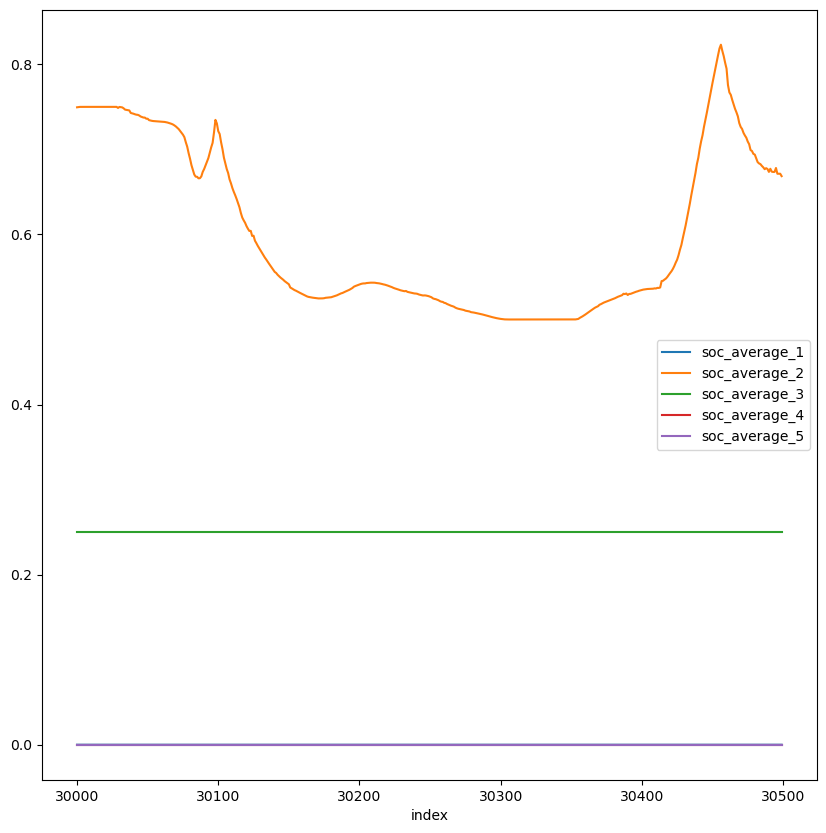

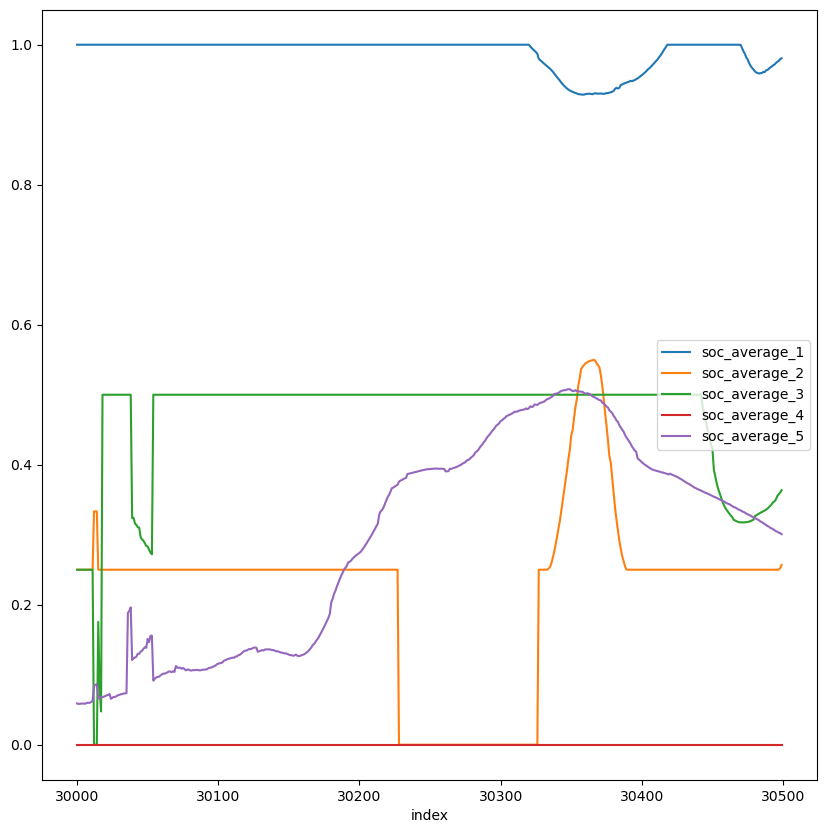

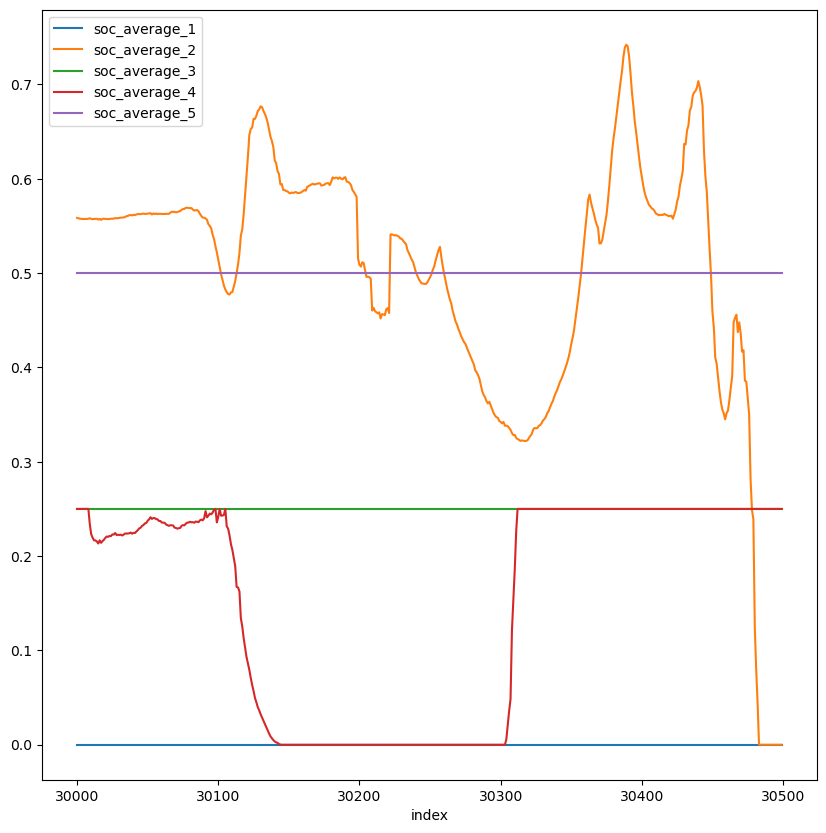

In [635]:
grouped = avg_eng.groupby('GROUP')

for name, group in grouped:
    group.iloc[30000:30500][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(10,10))

### Video of plot

### Windows

In [636]:
# #normalise

for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        df_dist["distance_%s_%s"% (i,j)] = MinMaxScaler().fit_transform(df_dist[["distance_%s_%s"% (i,j)]])

df_dist.iloc[7000:7100]

distance_1_2  distance_1_3  distance_1_4  distance_1_5  distance_2_1  \
7000      0.269363      0.325557      0.176391      0.407288      0.269363   
7001      0.269476      0.325271      0.176046      0.407769      0.269476   
7002      0.269576      0.325143      0.175680      0.408480      0.269576   
7003      0.269608      0.324850      0.175295      0.408927      0.269608   
7004      0.269573      0.324478      0.174872      0.409252      0.269573   
...            ...           ...           ...           ...           ...   
7095      0.276668      0.318155      0.161301      0.427895      0.276668   
7096      0.276557      0.318170      0.161342      0.427854      0.276557   
7097      0.276360      0.318178      0.161393      0.427765      0.276360   
7098      0.276108      0.318022      0.161364      0.427474      0.276108   
7099      0.276002      0.318034      0.161429      0.427390      0.276002   

      distance_2_3  distance_2_4  distance_2_5  distance_3_1  distance_3_2  \
7000      0.169397      0.256034      0.135910      0.325557      0.169397   
7001      0.169723      0.256219      0.135747      0.325271      0.169723   
7002      0.169877      0.256203      0.135572      0.325143      0.169877   
7003      0.170126      0.256327      0.135400      0.324850      0.170126   
7004      0.170344      0.256426      0.135269      0.324478      0.170344   
...            ...           ...           ...           ...           ...   
7095      0.168059      0.254002      0.145000      0.318155      0.168059   
7096      0.167721      0.253733      0.145234      0.318170      0.167721   
7097      0.167446      0.253462      0.145287      0.318178      0.167446   
7098      0.167100      0.253197      0.145552      0.318022      0.167100   
7099      0.166792      0.252956      0.145783      0.318034      0.166792   

      ...  distance_3_5  distance_4_1  distance_4_2  distance_4_3  \
7000  ...      0.315502      0.176391      0.256034      0.148061   
7001  ...      0.315535      0.176046      0.256219      0.147967   
7002  ...      0.315567      0.175680      0.256203      0.147919   
7003  ...      0.315594      0.175295      0.256327      0.147875   
7004  ...      0.315628      0.174872      0.256426      0.147828   
...   ...           ...           ...           ...           ...   
7095  ...      0.320340      0.161301      0.254002      0.146459   
7096  ...      0.320391      0.161342      0.253733      0.146441   
7097  ...      0.320375      0.161393      0.253462      0.146417   
7098  ...      0.320433      0.161364      0.253197      0.146396   
7099  ...      0.320487      0.161429      0.252956      0.146370   

      distance_4_5  distance_5_1  distance_5_2  distance_5_3  distance_5_4  \
7000      0.301555      0.407288      0.135910      0.315502      0.301555   
7001      0.301547      0.407769      0.135747      0.315535      0.301547   
7002      0.301488      0.408480      0.135572      0.315567      0.301488   
7003      0.301472      0.408927      0.135400      0.315594      0.301472   
7004      0.301451      0.409252      0.135269      0.315628      0.301451   
...            ...           ...           ...           ...           ...   
7095      0.300335      0.427895      0.145000      0.320340      0.300335   
7096      0.300364      0.427854      0.145234      0.320391      0.300364   
7097      0.300355      0.427765      0.145287      0.320375      0.300355   
7098      0.300390      0.427474      0.145552      0.320433      0.300390   
7099      0.300427      0.427390      0.145783      0.320487      0.300427   

      Frame  
7000   7000  
7001   7001  
7002   7002  
7003   7003  
7004   7004  
...     ...  
7095   7095  
7096   7096  
7097   7097  
7098   7098  
7099   7099  

[100 rows x 21 columns]

In [229]:
#replace nan values
df_dist.fillna(0)
df_dist.iloc[7000:]

distance_1_2  distance_1_3  distance_1_4  distance_1_5  distance_2_1  \
7000       0.487544      0.581174      0.317724      0.325207      0.487544   
7001       0.487436      0.580818      0.317362      0.325770      0.487436   
7002       0.487275      0.580529      0.316911      0.326376      0.487275   
7003       0.487171      0.580191      0.316560      0.326993      0.487171   
7004       0.487020      0.579838      0.316171      0.327618      0.487020   
...             ...           ...           ...           ...           ...   
59309      0.324282      0.056175           NaN      0.022477      0.324282   
59310      0.273140      0.294360           NaN      0.123283      0.273140   
59311      0.273436      0.294540           NaN      0.123488      0.273436   
59312      0.273647      0.294704           NaN      0.123794      0.273647   
59313           NaN           NaN           NaN           NaN           NaN   

       distance_2_3  distance_2_4  distance_2_5  distance_3_1  distance_3_2  \
7000       0.657698      0.582012      0.420142      0.581174      0.657698   
7001       0.657599      0.582281      0.419942      0.580818      0.657599   
7002       0.657455      0.582516      0.419656      0.580529      0.657455   
7003       0.657394      0.582786      0.419394      0.580191      0.657394   
7004       0.657309      0.583033      0.419095      0.579838      0.657309   
...             ...           ...           ...           ...           ...   
59309      0.284133           NaN      0.450626      0.056175      0.284133   
59310      0.006048           NaN      0.246493      0.294360      0.006048   
59311      0.006026           NaN      0.246653      0.294540      0.006026   
59312      0.005985           NaN      0.246548      0.294704      0.005985   
59313      0.005958      0.305109      0.246547           NaN      0.005958   

       ...  distance_3_5  distance_4_1  distance_4_2  distance_4_3  \
7000   ...      0.794175      0.317724      0.582012      0.365556   
7001   ...      0.794487      0.317362      0.582281      0.365555   
7002   ...      0.794866      0.316911      0.582516      0.365705   
7003   ...      0.795217      0.316560      0.582786      0.365710   
7004   ...      0.795585      0.316171      0.583033      0.365736   
...    ...           ...           ...           ...           ...   
59309  ...      0.035185           NaN           NaN           NaN   
59310  ...      0.205015           NaN           NaN           NaN   
59311  ...      0.204995           NaN           NaN           NaN   
59312  ...      0.204855           NaN           NaN           NaN   
59313  ...      0.204842           NaN      0.305109      0.290276   

       distance_4_5  distance_5_1  distance_5_2  distance_5_3  distance_5_4  \
7000       0.556196      0.325207      0.420142      0.794175      0.556196   
7001       0.557024      0.325770      0.419942      0.794487      0.557024   
7002       0.557868      0.326376      0.419656      0.794866      0.557868   
7003       0.558736      0.326993      0.419394      0.795217      0.558736   
7004       0.559625      0.327618      0.419095      0.795585      0.559625   
...             ...           ...           ...           ...           ...   
59309           NaN      0.022477      0.450626      0.035185           NaN   
59310           NaN      0.123283      0.246493      0.205015           NaN   
59311           NaN      0.123488      0.246653      0.204995           NaN   
59312           NaN      0.123794      0.246548      0.204855           NaN   
59313      0.130012           NaN      0.246547      0.204842      0.130012   

       Frame  
7000    7000  
7001    7001  
7002    7002  
7003    7003  
7004    7004  
...      ...  
59309  59309  
59310  59310  
59311  59311  
59312  59312  
59313  59313  

[52314 rows x 21 columns]

In [230]:
def calculate_social_engagement(df_dist, avg_eng, column_names, window_size, int_df):

    for index, row in df_dist.loc[6000:60000].iterrows():
        for i in column_names:
            last_index = -window_size
            count = 0
            selector = df_dist[i][index] < 1.2

            if selector and index >= (last_index + window_size):
                last_index = index
                count += 1
                for window_offset in range(-window_size, window_size):
                    frame_idx = row["Frame"] + window_offset
                    name = i.replace('distance_', '')
                    participant = name.split("_")[0]
                    
                    eng = float(avg_eng[avg_eng["index"] == frame_idx]["soc_average_%s" % participant])
                    ro = pd.Series([participant, window_offset, eng], index=['ID', 'Frame', 'social_engagement'])
                    int_df = pd.concat([int_df, ro.to_frame().T])

        return int_df

# int_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement'])

# column_names = ['distance_1_2', 'distance_1_3', 'distance_1_4', 'distance_1_5',
#                'distance_2_1', 'distance_2_3', 'distance_2_4', 'distance_2_5',
#                'distance_3_1', 'distance_3_2', 'distance_3_4', 'distance_3_5',
#                'distance_4_1', 'distance_4_2', 'distance_4_3', 'distance_4_5',
#                'distance_5_1', 'distance_5_2', 'distance_5_3', 'distance_5_4']

# # column_names = ["fov_p_1_2", "fov_p_1_3", "fov_p_1_4", "fov_p_1_5",
# #                "fov_p_2_1", "fov_p_2_3", "fov_p_2_4", "fov_p_2_5",
# #                "fov_p_3_1", "fov_p_3_2", "fov_p_3_4", "fov_p_3_5",
# #                "fov_p_4_1", "fov_p_4_2", "fov_p_4_3", "fov_p_4_5",
# #                "fov_p_5_1", "fov_p_5_2", "fov_p_5_3", "fov_p_5_4",]
# WINDOW_SIZE = 100     # Define the window size
# int_df = calculate_social_engagement(df_dist, avg_eng, column_names, WINDOW_SIZE, int_df)
# int_df = int_df.reset_index()
# int_df = int_df.drop('index', axis=1)
# int_df

/tmp/ipykernel_5755/1992541080.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  eng = float(avg_eng[avg_eng["index"] == frame_idx]["soc_average_%s" % participant])
/tmp/ipykernel_5755/1992541080.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  eng = float(avg_eng[avg_eng["index"] == frame_idx]["soc_average_%s" % participant])
/tmp/ipykernel_5755/1992541080.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  eng = float(avg_eng[avg_eng["index"] == frame_idx]["soc_average_%s" % participant])
/tmp/ipykernel_5755/1992541080.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  eng = float(avg_

ID Frame social_engagement
0     1  -100               0.5
1     1   -99               0.5
2     1   -98               0.5
3     1   -97               0.5
4     1   -96               0.5
...  ..   ...               ...
3995  5    95              0.25
3996  5    96              0.25
3997  5    97              0.25
3998  5    98              0.25
3999  5    99              0.25

[4000 rows x 3 columns]

In [21]:
# int_df.loc[int_df['ID'] == 1, ['ID','Frame','social_engagement']]
# int_df.iloc[7000:]

Empty DataFrame
Columns: [ID, Frame, social_engagement]
Index: []

In [237]:
int_df["ID"] = pd.to_numeric(int_df["ID"])
int_df["Frame"] = pd.to_numeric(int_df["Frame"])
int_df["social_engagement"] = pd.to_numeric(int_df["social_engagement"])

int_df.dtypes


TypeError: no numeric data to plot

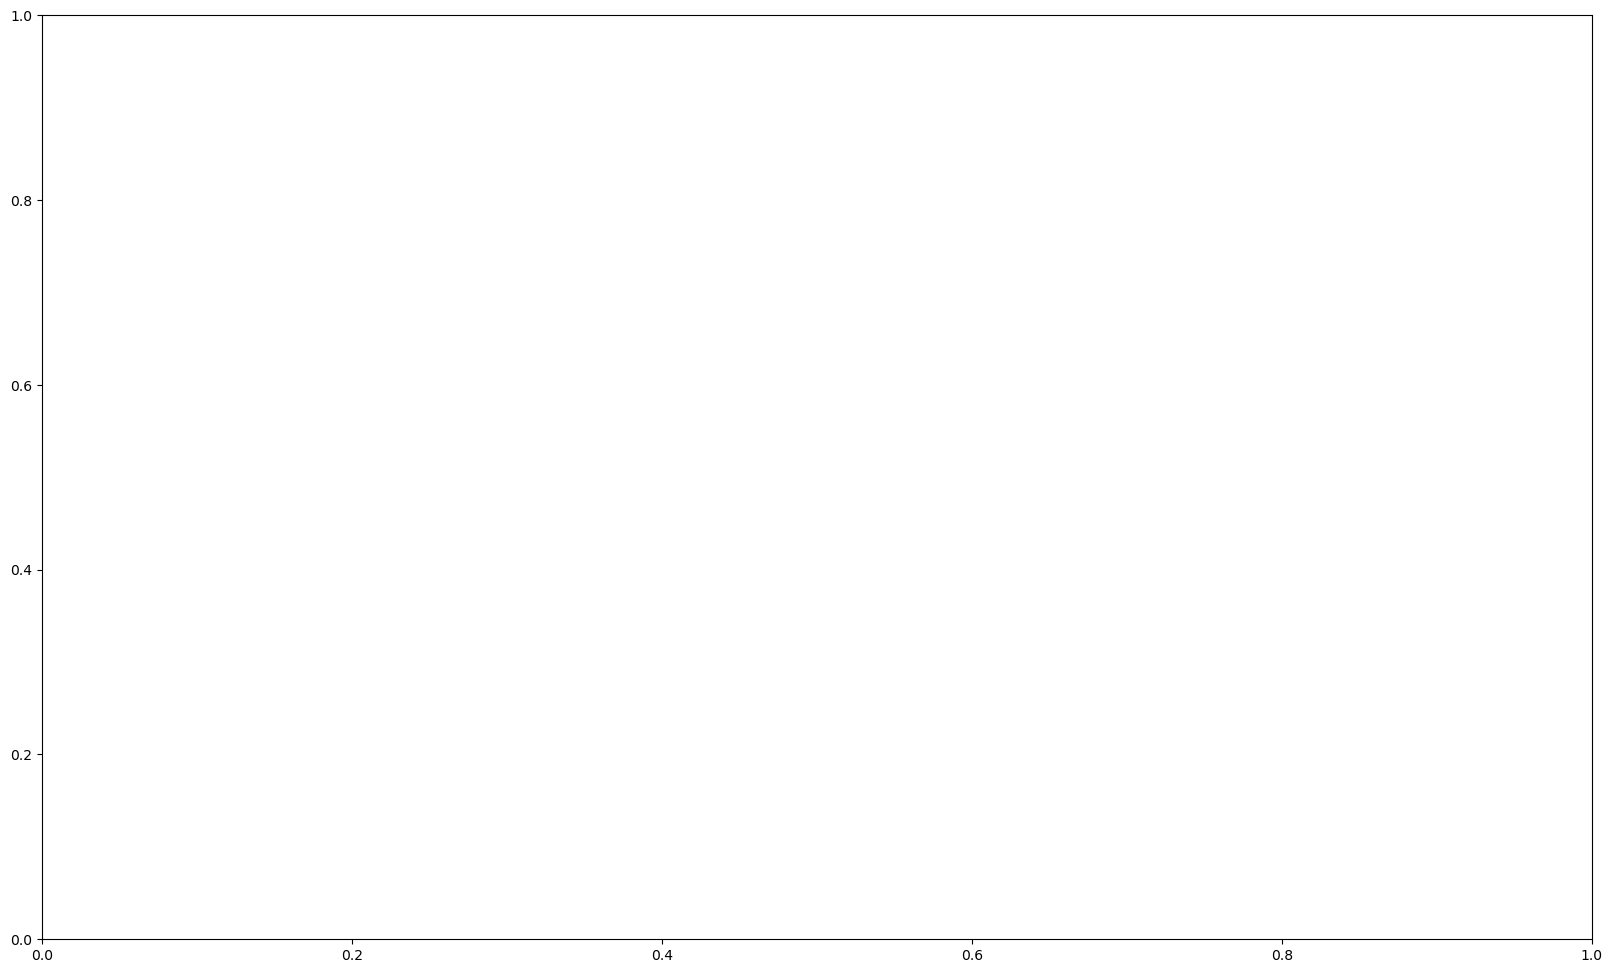

In [242]:
fig, ax = plt.subplots(figsize=(20,12))

# sns.lineplot(data=int_df,y="social_engagement",x="Frame",hue="ID",ci=None)

# plt.plot(int_df['Frame'].values, int_df['social_engagement'].values)

int_df.iloc[0:1000][["social_engagement"]].plot(x="social_engagement", kind="line", figsize=(10,10))

## Create Video

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Done 0.0%
Done 0.025%
Done 0.05%
Done 0.075%
Done 0.1%
Done 0.125%
Done 0.15%
Done 0.175%
Done 0.2%
Done 0.225%
Done 0.25%
Done 0.275%
Done 0.3%
Done 0.325%
Done 0.35%
Done 0.375%
Done 0.4%
Done 0.425%
Done 0.45%
Done 0.475%
Done 0.5%
Done 0.525%
Done 0.55%
Done 0.575%
Done 0.6%
Done 0.625%
Done 0.65%
Done 0.675%
Done 0.7%
Done 0.725%
Done 0.75%
Done 0.775%
Done 0.8%
Done 0.825%
Done 0.85%
Done 0.875%
Done 0.9%
Done 0.925%
Done 0.95%
Done 0.975%
Done 1.0%
Done 1.025%
Done 1.05%
Done 1.075%
Done 1.1%
Done 1.125%
Done 1.15%
Done 1.175%
Done 1.2%
Done 1.225%
Done 1.25%
Done 1.275%
Done 1.3%
Done 1.325%
Done 1.35%
Done 1.375%
Done 1.4%
Done 1.425%
Done 1.45%
Done 1.475%
Done 1.5%
Done 1.525%
Done 1.55%
Done 1.575%
Done 1.6%
Done 1.625%
Done 1.65%
Done 1.675%
Done 1.7%
Done 1.725%
Done 1.75%
Done 1.775%
Done 1.8%
Done 1.825%
Done 1.85%
Done 1.875%
Done 1.9%
Done 1.925%
Done 1.95%
Done 1.975%
Done 2.0%
Done 2.025%
Done 2.05%
Done 2.075%
Done 2.1%
Done 2.125%
Done 2.15%
Done 2.175%
Done 2.2%


IndexError: single positional indexer is out-of-bounds

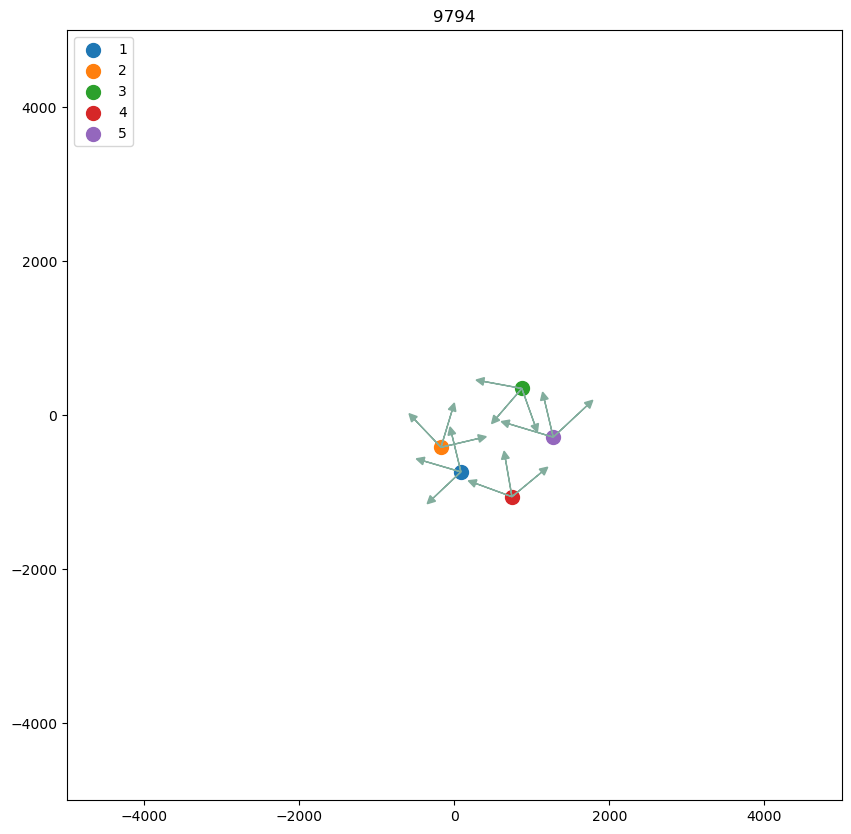

In [688]:
#! python3

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import math
import numpy as np
import matplotlib.animation as animation

VICON_FPS = 100
VIDEO_FPS = 20

start = 400 * VIDEO_FPS
end =  600 * VIDEO_FPS  # 10sec video

#####################################################

csv_files = Path(".").glob("study3H.csv")
data_df = pd.concat([pd.read_csv(fp) for fp in csv_files])


# convert df index to time periods
data_df.set_index(
    pd.date_range(0, periods=len(data_df), freq="%fS" % (1 / VICON_FPS)), inplace=True
)

# resample df to target FPS
data_df = data_df.resample("%fS" % (1 / VIDEO_FPS)).mean()


data_df['1RZ'] = data_df['1RZ'] - 90
# data_df['2RZ'] = data_df['2RZ'] - 90
data_df['3RZ'] = data_df['3RZ'] + 90
data_df['4RZ'] = data_df['4RZ'] - 90
data_df['5RZ'] = data_df['5RZ'] - 90



fov_angle = math.radians(60)

length = 500

fig, ax = plt.subplots(figsize=(10, 10))


def init():
    plt.legend(loc="upper left")

    plt.xlim(-5000, 5000)
    plt.ylim(-5000, 5000)


def update(frame):

    print("Done %s%%" % (100 * (frame - start) / (end - start)))

    row = data_df.iloc[frame]

    x = row["1TX"]
    y = row["1TY"]
    yaw = row["1RZ"]

    fig.clear()

    plt.xlim(-5000, 5000)
    plt.ylim(-5000, 5000)

    plt.scatter(x, y, s=100, label="1")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["2TX"]
    y = row["2TY"]
    yaw = row["2RZ"]
    plt.scatter(x, y, s=100, label="2")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["3TX"]
    y = row["3TY"]
    yaw = row["3RZ"]
    plt.scatter(x, y, s=100, label="3")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["4TX"]
    y = row["4TY"]
    yaw = row["4RZ"]
    plt.scatter(x, y, s=100, label="4")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["5TX"]
    y = row["5TY"]
    yaw = row["5RZ"]
    plt.scatter(x, y, s=100, label="5")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        600 * np.cos(yaw - fov_angle),
        600 * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        600 * np.cos(yaw + fov_angle),
        600 * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    plt.legend(loc="upper left")
    plt.title(frame)
    
ani = animation.FuncAnimation(fig, update, frames=range(start, end), init_func=init)
writergif = animation.PillowWriter(fps=20)
ani.save('study3_3.gif',writer=writergif)


# ani.save("test.mp4", fps=VIDEO_FPS)


## Using human verified interaction starting points

In [652]:
# Load the CSV file
file = Path("/home/nicola/gameapp/data/studyanalysis/group1.txt")
elan_df = pd.read_csv(file, sep='\t').fillna(0)
filename = os.path.basename(file)
group = os.path.splitext(filename)[0]
# Initialize an empty DataFrame
group_df = pd.DataFrame(columns=['GROUP','Participant', 'Frame', 'Interacted'])

# Create a list of lists with the desired data
data = [[column, x[0], x[1]] for column in elan_df.columns for x in elan_df[elan_df[column] != 0][column].str.split(", ")]
for i in data:
    i.insert(0, group)
# print(data)

# Populate the DataFrame from the data list
group_df = pd.DataFrame(data, columns=['GROUP', 'Participant', 'Frame', 'Interacted'])

group_df

GROUP Participant Frame Interacted
0   group1           1  1475          4
1   group1           1  1500          5
2   group1           1  1552          4
3   group1           1  2120    2 3 4 5
4   group1           1  2206    2 3 4 5
5   group1           1  2913      2 3 4
6   group1           1  3021      2 3 4
7   group1           1  3272          4
8   group1           1  4051    2 3 4 5
9   group1           1  7421    2 3 4 5
10  group1           1  7690    2 3 4 5
11  group1           1  8736    2 3 4 5
12  group1           1  9331    2 3 4 5
13  group1           1  9921    2 3 4 5
14  group1           2  2587      1 3 4
15  group1           2  4217    1 3 4 5
16  group1           2  7408    1 3 4 5
17  group1           2  9293        3 5
18  group1           2  9408    1 3 4 5
19  group1           2  9930    1 3 4 5
20  group1           3  1354    1 2 4 5
21  group1           3  2361          1
22  group1           3  2476      1 2 4
23  group1           3  3001        4 5
24  group1           3  3041        1 2
25  group1           3  3322        1 4
26  group1           3  3367        2 5
27  group1           3  3507        2 5
28  group1           3  3871        1 4
29  group1           3  4213    1 2 4 5
30  group1           3  7246    1 2 4 5
31  group1           3  7456    1 2 4 5
32  group1           4  1274      1 2 5
33  group1           4  1779          3
34  group1           4  2490      1 2 3
35  group1           4  2841          5
36  group1           4  3060      1 2 3
37  group1           4  3131        1 5
38  group1           4  4137    1 2 3 5
39  group1           4  7473    1 2 3 5
40  group1           4  7861    1 2 3 5
41  group1           5  1220    1 2 3 4
42  group1           5  2420    1 2 3 4
43  group1           5  2726    1 2 3 4
44  group1           5  3278          2
45  group1           5  4747    1 2 3 4
46  group1           5  7876        2 3
47  group1           5  9830    1 2 3 4

In [653]:
VICON_FPS = 100
VIDEO_FPS = 20

for index, row in group_df.iterrows():
    frame = row['Frame']
    frame = (int(frame)/20)*100
    group_df.at[index,'Frame'] = int(frame)

group_df

GROUP Participant  Frame Interacted
0   group1           1   7375          4
1   group1           1   7500          5
2   group1           1   7759          4
3   group1           1  10600    2 3 4 5
4   group1           1  11030    2 3 4 5
5   group1           1  14565      2 3 4
6   group1           1  15105      2 3 4
7   group1           1  16360          4
8   group1           1  20255    2 3 4 5
9   group1           1  37105    2 3 4 5
10  group1           1  38450    2 3 4 5
11  group1           1  43680    2 3 4 5
12  group1           1  46655    2 3 4 5
13  group1           1  49605    2 3 4 5
14  group1           2  12935      1 3 4
15  group1           2  21085    1 3 4 5
16  group1           2  37040    1 3 4 5
17  group1           2  46465        3 5
18  group1           2  47040    1 3 4 5
19  group1           2  49650    1 3 4 5
20  group1           3   6770    1 2 4 5
21  group1           3  11805          1
22  group1           3  12380      1 2 4
23  group1           3  15005        4 5
24  group1           3  15205        1 2
25  group1           3  16610        1 4
26  group1           3  16835        2 5
27  group1           3  17535        2 5
28  group1           3  19355        1 4
29  group1           3  21065    1 2 4 5
30  group1           3  36230    1 2 4 5
31  group1           3  37280    1 2 4 5
32  group1           4   6370      1 2 5
33  group1           4   8895          3
34  group1           4  12450      1 2 3
35  group1           4  14205          5
36  group1           4  15300      1 2 3
37  group1           4  15655        1 5
38  group1           4  20685    1 2 3 5
39  group1           4  37365    1 2 3 5
40  group1           4  39305    1 2 3 5
41  group1           5   6100    1 2 3 4
42  group1           5  12100    1 2 3 4
43  group1           5  13630    1 2 3 4
44  group1           5  16390          2
45  group1           5  23735    1 2 3 4
46  group1           5  39380        2 3
47  group1           5  49150    1 2 3 4

In [681]:

def calculate_social_engagement(df_dist, avg_eng, window_size, int_df):
    # Create a set of unique frames from group_df
    group_frames = set(group_df['Frame'])
    # Filter df_dist to only include rows with frames that are in group_frames
    df_filtered = df_dist[df_dist.index.isin(group_frames)]

    # Iterate through the filtered DataFrame
    for index, row in df_filtered.iterrows():
        last_index = -window_size
        count = 0   
        selector = index
        
        g_row = group_df.loc[group_df['Frame'] == index]
        g_par = g_row['Participant'].values[0]
        g_int = g_row['Interacted'].values[0]
        
        if selector and index >= (last_index + window_size):
            last_index = index
            count += 1
            
            for window_offset in range(-window_size, window_size):
                frame_idx = row["Frame"] + window_offset
                # name = i.replace('distance_', '')
                # participant = name.split("_")[0]
                frames = avg_eng[avg_eng["index"] == frame_idx]
                for index, roww in frames.iterrows():
                    eng = roww["soc_average_%s" % g_par]
                    # eng = float(avg_eng[avg_eng["index"] == frame_idx]["soc_average_%s" % g_par])
                    ro = pd.Series([g_par, window_offset, eng], index=['ID', 'Frame', 'social_engagement'])
                    int_df = pd.concat([int_df, ro.to_frame().T])
    return int_df

int_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement'])

WINDOW_SIZE = 100     # Define the window size
int_df = calculate_social_engagement(df_dist, avg_eng, WINDOW_SIZE, int_df)
int_df = int_df.reset_index()
int_df = int_df.drop('index', axis=1)
int_df[790:950]

ID Frame social_engagement
790  5    31              0.25
791  5    31              0.25
792  5    32          0.709754
793  5    32           0.46335
794  5    32          0.340282
..  ..   ...               ...
945  5    57              0.75
946  5    57              0.25
947  5    57              0.25
948  5    58          0.724005
949  5    58          0.459186

[160 rows x 3 columns]

In [682]:
interaction_profiles = int_df.groupby(['ID', 'Frame']).agg({'social_engagement':['mean','std']})
interaction_profiles.columns = ['_'.join(col) for col in interaction_profiles.columns.values]
interaction_profiles = interaction_profiles.reset_index()
interaction_profiles

ID  Frame social_engagement_mean  social_engagement_std
0    1   -100               0.407949               0.257082
1    1    -99               0.408661               0.255996
2    1    -98               0.411137               0.254172
3    1    -97               0.411136               0.254355
4    1    -96               0.406278               0.255530
..  ..    ...                    ...                    ...
995  5     95               0.400313               0.257840
996  5     96               0.400612               0.257337
997  5     97               0.400941               0.257543
998  5     98               0.400911               0.257146
999  5     99               0.401072               0.257444

[1000 rows x 4 columns]

In [683]:
int_df[int_df["Frame"] ==0].groupby('ID').count()

Frame  social_engagement
ID                          
1     473                473
2     185                185
3     432                432
4     324                324
5     232                232

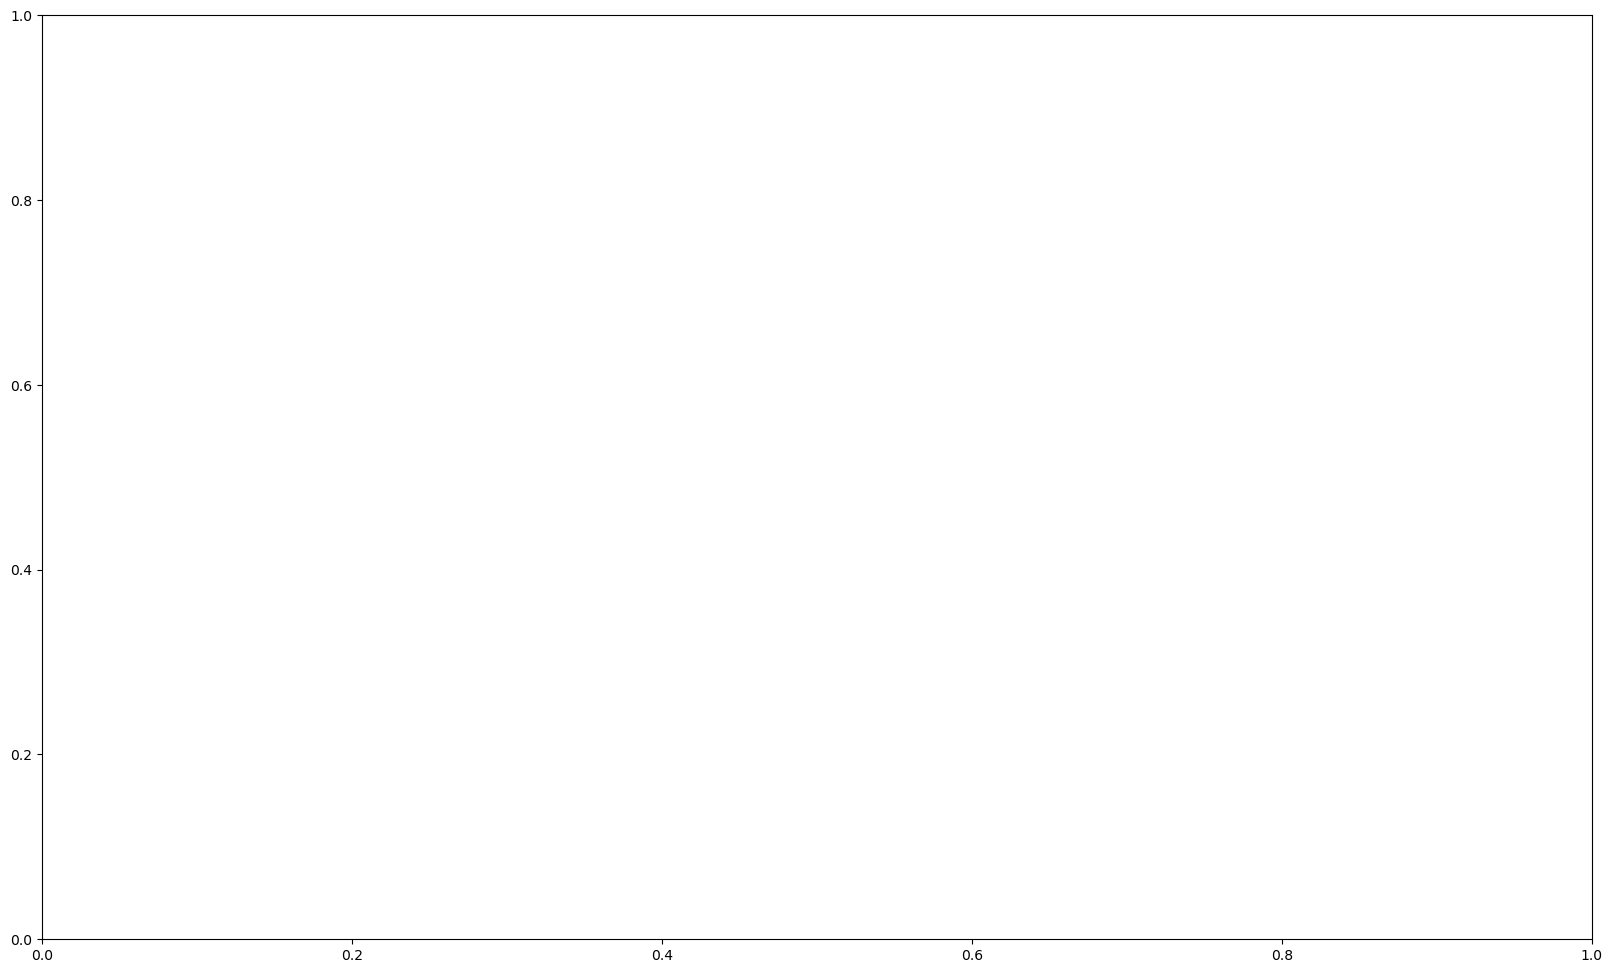

In [684]:
fig, ax = plt.subplots(figsize=(20,12))

# grouped = int_df.groupby('ID')
# for key, group in grouped:
#     group.plot(ax=ax, kind='line', x='Frame', y='social_engagement', label=key)
# plt.show()

# int_df.plot(x="Frame", y="social_engagement")


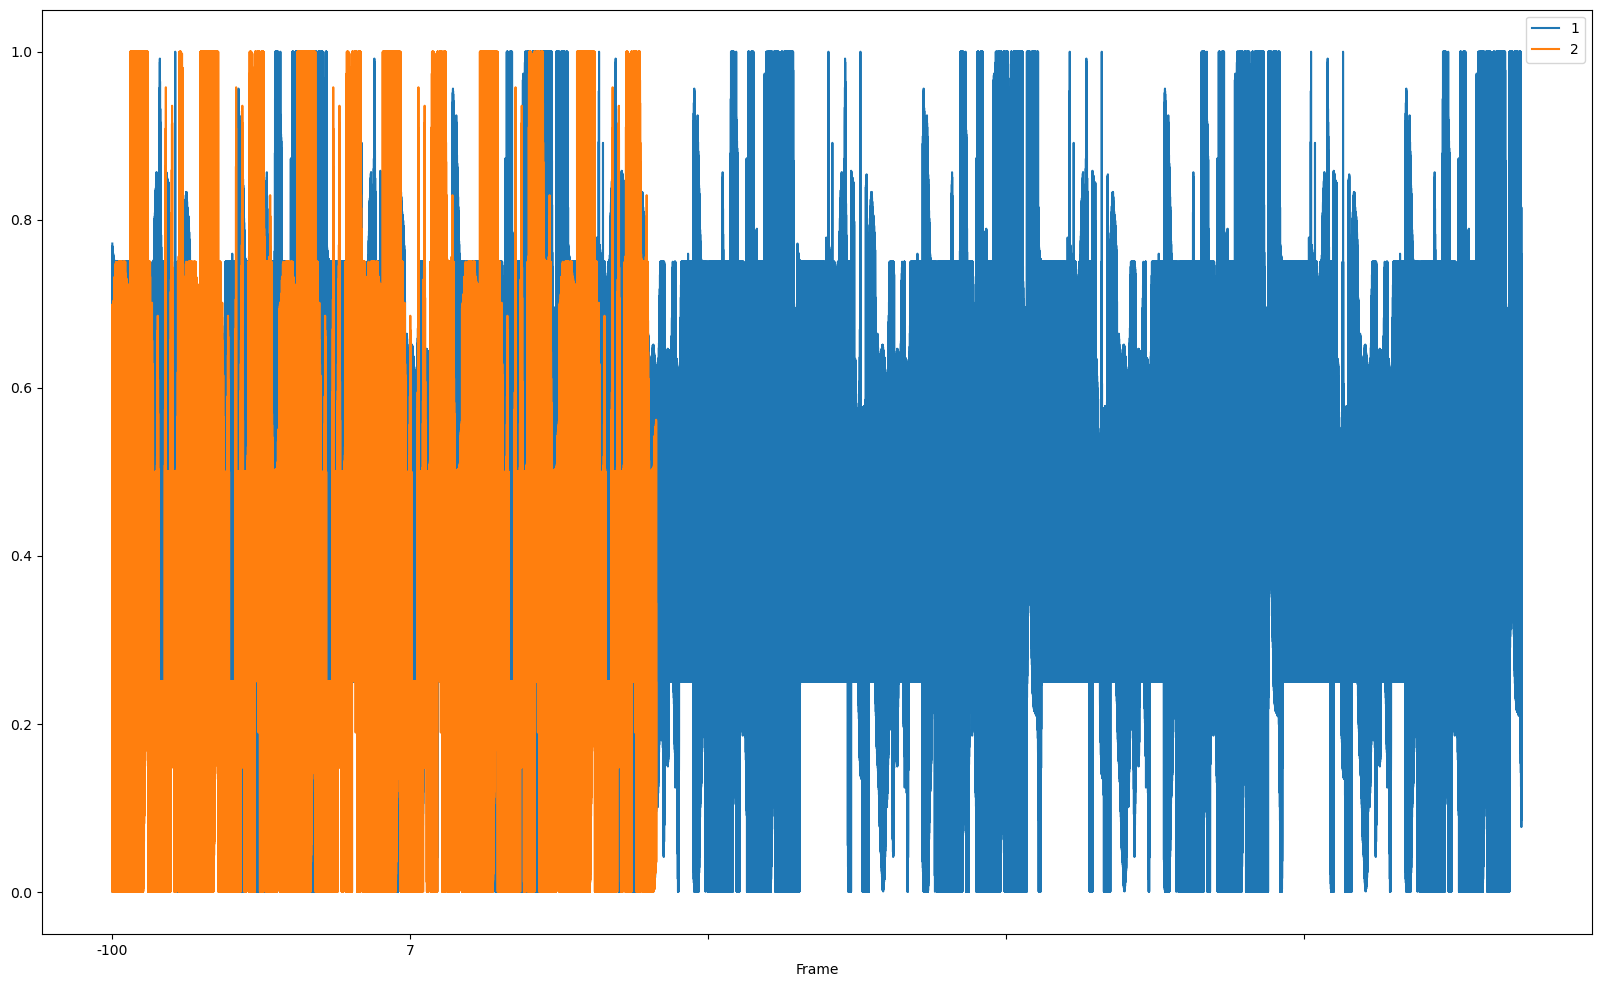

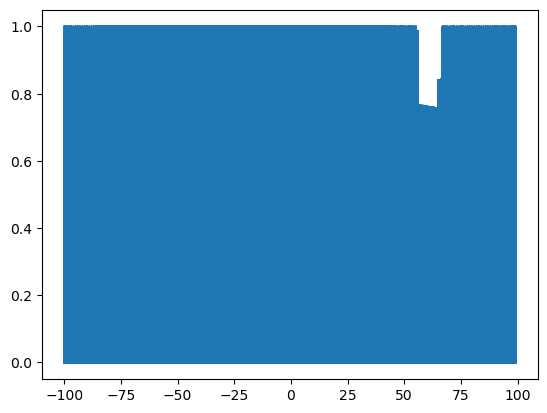

In [685]:
fig, ax = plt.subplots(figsize=(20,12))
sub_df = pd.DataFrame()
rang = int_df
grouped = int_df[int_df["ID"].isin(["1","2"])].groupby('ID')
for key, group in grouped:
    group.plot(ax=ax, kind='line', x='Frame', y='social_engagement', label=key)
plt.show()


sub_df = int_df[int_df['ID'] == '1']
plt.plot(sub_df['Frame'].values, sub_df['social_engagement'].values)

## Correlations between social engagement profiles and personality

In [465]:
csv_files = Path("/home/nicola/gameapp/data/studyanalysis/").glob("big5.csv")
big5_df = pd.concat([pd.read_csv(fp) for fp in csv_files])

/tmp/ipykernel_5755/439268425.py:115: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (5).

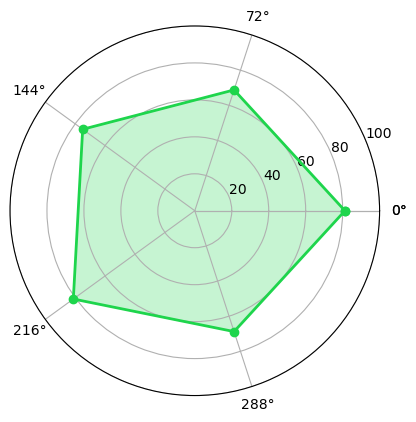

In [466]:
emotional_stability = 0
extraversion = 0
agreeableness = 0
conscientiousness = 0
intellect = 0

par = []
es = []
ex = []
ag = []
co = []
ig = []
age = []
sex = []
country = []
helmet = []
group = []

big5 = ["emotional_stability", "extraversion", "agreeableness", "conscientiousness", "intellect"]

dfbig5 = pd.DataFrame()  

for index, row in big5_df.iterrows():

    participant = row['p_id']
    r = lambda: random.randint(0,255)
    
    ec = row['n1'] + row['n2'] + row['n3'] + row['n4']
    e = row['e1'] + row['e2'] + row['e3'] + row['e4']
    a = row['a1'] + row['a2'] + row['a3'] + row['a4']
    c = row['c1'] + row['c2'] + row['c3'] + row['c4']
    i = row['i1'] + row['i2'] + row['i3'] + row['i4']
    
    p_age = row['age']
    p_sex = row['gender']
    p_country = row['culture']
    
    emotional_stability = (ec/16)*100
    extraversion = (e/16)*100
    agreeableness = (a/16)*100
    conscientiousness = (c/16)*100
    intellect = (i/16)*100

    values = [emotional_stability,extraversion,agreeableness,conscientiousness,intellect]
    
    par.append(participant)
    es.append(emotional_stability)
    ex.append(extraversion)
    ag.append(agreeableness)
    co.append(conscientiousness)
    ig.append(intellect)
    age.append(p_age)
    sex.append(p_sex)
    country.append(p_country)
    helmet.append(row['helmet'])
    group.append(row['group'])
    
    
    
#     angles=np.linspace(0, 2*np.pi, len(big5), endpoint=False)
#     stats=np.concatenate((values,[values[0]]))
#     angles=np.concatenate((angles,[angles[0]]))
    
#     fig=plt.figure()
#     graph_color = ('#%02X%02X%02X' % (r(),r(),r()))
#     ax = fig.add_subplot(111, polar=True)  # Set polar axis
#     plt.ylim(0,100) # axis 0-100
#     ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)
#     ax.fill(angles, stats, alpha=0.25, color=graph_color)  #Fulfill the area
#     ax.set_thetagrids(angles * 180/np.pi, big5)  # Set the label for each axis
#     ax.grid(True)

# dfbig5["participant"] = par
dfbig5["emotional_stability"] = es
dfbig5["extraversion"] = ex
dfbig5["agreeableness"] = ag
dfbig5["conscientiousness"] = co
dfbig5["intellect"] = ig
dfbig5["helmet"] = helmet
dfbig5["group"] = group
dfbig5["age"] = age
# dfbig5["sex"] = sex
# dfbig5["country"] = country

# print(dfbig5)
# ec = dfbig5['emotional_stability']
# e = dfbig5["extraversion"]
# a = dfbig5["agreeableness"] 
# c = dfbig5["conscientiousness"]
# i = dfbig5["intellect"]

emotional_stability = (ec/16)*100
extraversion = (e/16)*100
agreeableness = (a/16)*100
conscientiousness = (c/16)*100
intellect = (i/16)*100

values = [emotional_stability,extraversion,agreeableness,conscientiousness,intellect]

es.append(emotional_stability)
ex.append(extraversion)
ag.append(agreeableness)
co.append(conscientiousness)
ig.append(intellect)


angles=np.linspace(0, 2*np.pi, len(big5), endpoint=False)
stats=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
graph_color = ('#%02X%02X%02X' % (r(),r(),r()))
ax = fig.add_subplot(111, polar=True)  # Set polar axis
plt.ylim(0,100) # axis 0-100
ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)
ax.fill(angles, stats, alpha=0.25, color=graph_color)  #Fulfill the area
ax.set_thetagrids(angles * 180/np.pi, big5)  # Set the label for each axis
ax.grid(True)

print(es) 

In [537]:
group1 = dfbig5[dfbig5['group'] == 1]
  
# interaction_profiles = interaction_profiles[interaction_profiles["ID"].isin(group1.reset_index()["helmet"])]
soceng_mean = interaction_profiles.groupby("ID")["social_engagement_mean"].mean().reset_index()
# soceng_mean = soceng_mean.set_index("ID")

soceng_std = interaction_profiles.groupby("ID")["social_engagement_std"].mean().reset_index()
# soceng_std.index = np.arange(1, len(soceng_std) + 1)
# soceng_dfbig5std = soceng_std.set_index("ID")

group1

emotional_stability  extraversion  agreeableness  conscientiousness  \
0                75.00         68.75          75.00              43.75   
1                75.00         81.25          87.50              68.75   
2                75.00         81.25          75.00              93.75   
3                75.00         81.25          81.25              81.25   
4                68.75         81.25          75.00              68.75   

   intellect  helmet  group  age  
0      68.75       4      1   30  
1      75.00       2      1   29  
2      81.25       3      1   28  
3      75.00       5      1   28  
4      75.00       1      1   34

In [555]:
interaction_profiles_after = interaction_profiles[interaction_profiles["Frame"]>0]
interaction_profiles_before = interaction_profiles[interaction_profiles["Frame"]<0]

soceng_after_mean = interaction_profiles_after.groupby("ID")["social_engagement_mean"].mean().reset_index()
# soceng_after_mean = soceng_after_mean.set_index("ID")
soceng_after_mean = soceng_after_mean.rename(columns={"social_engagement_mean":"social_engagement_after"})

soceng_before_mean = interaction_profiles_before.groupby("ID")["social_engagement_mean"].mean().reset_index()
# soceng_before_mean = soceng_before_mean.set_index("ID")
soceng_before_mean = soceng_before_mean.rename(columns={"social_engagement_mean":"social_engagement_before"})

soceng_before_delta = soceng_after_mean.rename(columns={"social_engagement_after":"social_engagement_delta"})
soceng_before_delta["social_engagement_delta"] -= soceng_before_mean["social_engagement_before"]


interaction_profiles_after

ID  Frame social_engagement_mean  social_engagement_std
101  1      1               0.458319               0.238763
102  1      2               0.460193               0.236603
103  1      3               0.461092               0.234408
104  1      4               0.462629               0.233129
105  1      5                0.46437               0.231346
..  ..    ...                    ...                    ...
995  5     95               0.316875               0.223815
996  5     96               0.316701               0.223862
997  5     97               0.316545               0.223919
998  5     98               0.314988               0.221250
999  5     99               0.316111               0.223769

[495 rows x 4 columns]

In [579]:
group1 = dfbig5[dfbig5['group'] == 1]
group1 = group1.sort_values(by=['helmet'], ascending=True)
group1.index = np.arange(1, len(group1) + 1)


big5 = ["emotional_stability", "extraversion", "agreeableness", "conscientiousness", "intellect"]
df_corr = pd.concat([soceng_mean, soceng_std, soceng_after_mean, soceng_before_mean, soceng_before_delta], axis=1)
df_corr.index = np.arange(1, len(df_corr) + 1)

print(group1)
full_corr = pd.merge(group1, df_corr, left_index=True, right_index=True)
full_corr


   emotional_stability  extraversion  agreeableness  conscientiousness  \
1                68.75         81.25          75.00              68.75   
2                75.00         81.25          87.50              68.75   
3                75.00         81.25          75.00              93.75   
4                75.00         68.75          75.00              43.75   
5                75.00         81.25          81.25              81.25   

   intellect  helmet  group  age  
1      75.00       1      1   34  
2      75.00       2      1   29  
3      81.25       3      1   28  
4      68.75       4      1   30  
5      75.00       5      1   28  


emotional_stability  extraversion  agreeableness  conscientiousness  \
1                68.75         81.25          75.00              68.75   
2                75.00         81.25          87.50              68.75   
3                75.00         81.25          75.00              93.75   
4                75.00         68.75          75.00              43.75   
5                75.00         81.25          81.25              81.25   

   intellect  helmet  group  age ID social_engagement_mean ID  \
1      75.00       1      1   34  1               0.453617  1   
2      75.00       2      1   29  2                0.31925  2   
3      81.25       3      1   28  3               0.280504  3   
4      68.75       4      1   30  4               0.404982  4   
5      75.00       5      1   28  5               0.346756  5   

   social_engagement_std ID social_engagement_after ID  \
1               0.246591  1                 0.47209  1   
2               0.337294  2                0.327831  2   
3               0.319926  3                0.241676  3   
4               0.305962  4                0.408586  4   
5               0.245640  5                0.327169  5   

  social_engagement_before ID social_engagement_delta  
1                 0.435311  1                0.036779  
2                 0.310808  2                0.017022  
3                 0.318991  3               -0.077315  
4                 0.401667  4                0.006918  
5                 0.366223  5               -0.039054

(array([[0., 0., 1., 4., 0.],
        [0., 0., 1., 4., 0.],
        [0., 0., 0., 4., 1.],
        [1., 0., 2., 1., 1.],
        [0., 0., 1., 4., 0.]]),
 array([43.75, 53.75, 63.75, 73.75, 83.75, 93.75]),
 <a list of 5 BarContainer objects>)

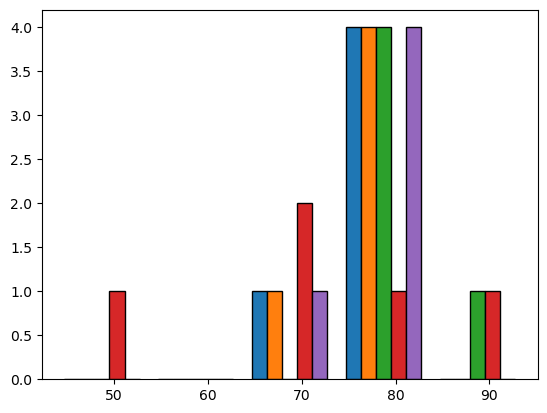

In [580]:
# sns.displot(data=full_corr[big5], kde=True)

plt.hist(full_corr[big5], ec='black', bins=5)

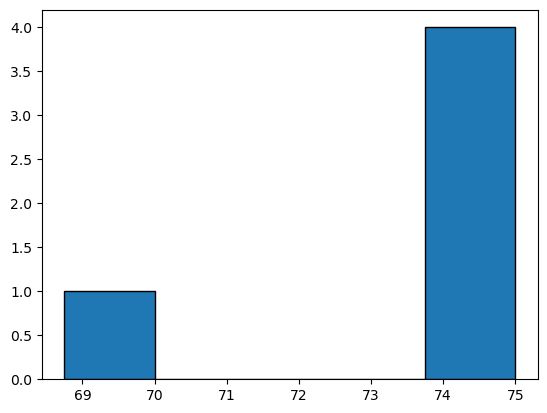

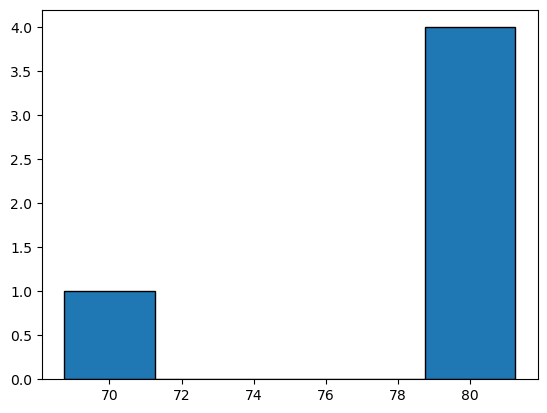

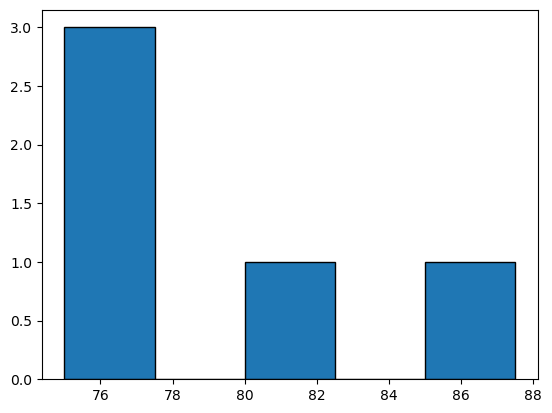

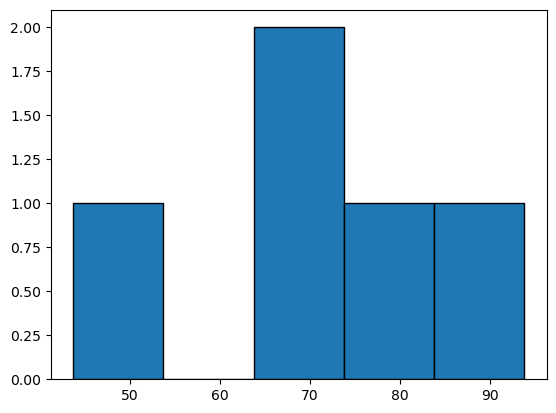

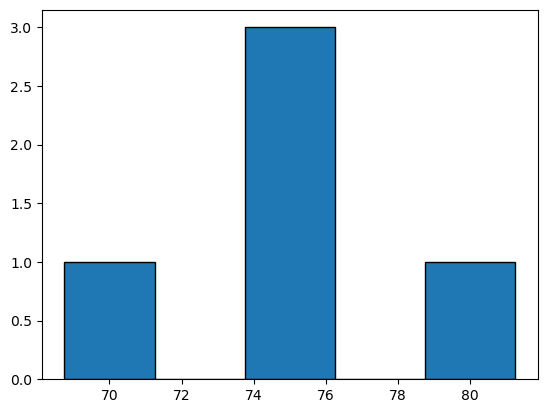

In [584]:
for column in full_corr[big5].columns:
    plt.figure()
    plt.hist(full_corr[column], ec='black', bins=5)

In [588]:
for cat in big5+ ["age"]:
    print("soceng_mean <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_mean"])))
    print("soceng_std <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_std"])))
    print("soceng_after <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_after"])))
    print("soceng_before <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_before"])))
    print("soceng_delta <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_delta"])))
    print()

soceng_mean <-> emotional_stability: (r, p): (-0.752276108873361, 0.1423804933256055) 
soceng_std <-> emotional_stability: (r, p): (0.5848786918621857, 0.30026717399449937) 
soceng_after <-> emotional_stability: (r, p): (-0.7413076709581148, 0.15166808599582962) 
soceng_before <-> emotional_stability: (r, p): (-0.7217003726972847, 0.16868874312627108) 
soceng_delta <-> emotional_stability: (r, p): (-0.5784766576544652, 0.30689759230252606) 

soceng_mean <-> extraversion: (r, p): (-0.3571508640912578, 0.5551228558503072) 
soceng_std <-> extraversion: (r, p): (-0.1956042696675026, 0.7525463089039447) 
soceng_after <-> extraversion: (r, p): (-0.3376340937982261, 0.5784242685090407) 
soceng_before <-> extraversion: (r, p): (-0.36832825382074497, 0.5418607519383319) 
soceng_delta <-> extraversion: (r, p): (-0.2179206085677117, 0.7247468873816433) 

soceng_mean <-> agreeableness: (r, p): (-0.39732150279451817, 0.5077592179408144) 
soceng_std <-> agreeableness: (r, p): (0.30879906528581313, 0

(0.8885831121646985, 0.043890024253892455)

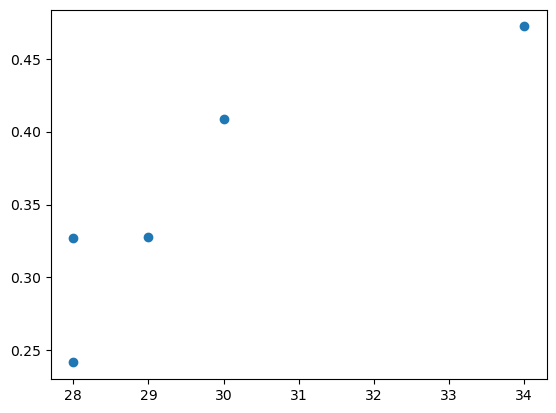

In [590]:
plt.scatter(full_corr["age"], full_corr["social_engagement_after"])

scipy.stats.pearsonr(full_corr["age"], full_corr["social_engagement_after"])

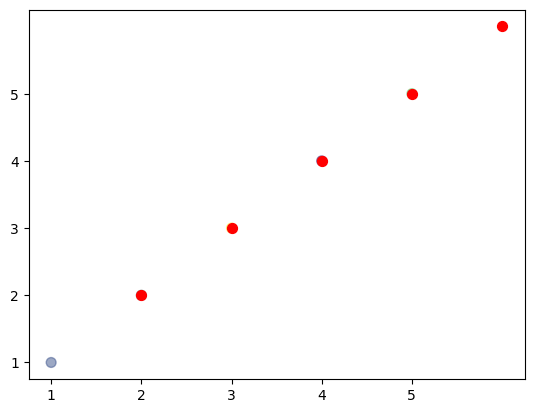

In [592]:


soceng_features = full_corr[full_corr.columns.difference(big5)].to_numpy()
kmeans = KMeans(n_clusters=5).fit(soceng_features)
centroids = kmeans.cluster_centers_


plt.scatter(x=soceng_features[:,0],y=soceng_features[:,1], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(x=soceng_features[:,0],y=soceng_features[:,1], s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

